# <font color='#197D75'> MD004 - Analysis of Variance (ANOVA) </font>

### <font color='#197D75'> Parte I </font>

Imagina que te llega un conjunto de datos que contiene tres variables categóricas>> A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)

####
En primer lugar es importante hacer una breve introduccion respecto al Analysis of Variance, tanto en su version One Way, como en su version Two Way.

One Way: se utiliza para comparar las medias de una variable continua dependiente, respecto de una variable categorica. Nos ayuda a determinar si hay diferencias significativas entre las categorias de los grupos respecto a la distribucion de la variable continua dependiente. La idea principal es verificar si, en promedio, al menos un grupo es diferente de los demás.

Two Way: permite analizar la significatividad de la influencia<font color='#197D75'> **simultánea**</font> de dos variables categóricas en una variable dependiente continua. En otras palabras, se utiliza para examinar cómo dos factores diferentes, con categorias distintas en cada uno, afectan las medias de los grupos de nuestra variable dependiente.

Si queremos evaluar la influencia de estas variables categoricas sobre la distribucion de una variable continua dependiente, debemos plantear algun tipo de estrategia, dado que ni el ANOVA One Way, ni el ANOVA Two Way nos permitiran hacer un analisis directo de estas relaciones. La unica manera que podemos encontrar para hacer un analisis del estilo es hacer una combinatoria de los grupos de cada variable categorica. Aqui encontraremos una salvacion, el ANOVA Two Ways nos permitira evaluar de manera pura la variabilidad de la distribucion de alguna de las 3 variables categoricas (supongamos que la variable A). 

Sin embargo, debemos realizar una combinatoria entre los grupos de las variables restantes (supongamos B y C), para poder continuar con el analisis de la variabilidad de todas nuestras variables categoricas respecto de nuestra variable continua dependiente. Tambien podriamos hacer lo mismo utilizando el ANOVA One Way, sin embargo, no podriamos evaluar ninguna variable categorica de manera aislada, todas podran ser evaluadas a traves de una combinatoria entre ellas. Lo que si es cierto, es que de esta manera podriamos evaluar todas las interacciones y ver si ellas son significativas, pero con la primera estrategia esto tambien lo podriamos ver. Al no contar con una herramienta que nos permita evaluar de manera pura las tres variables en conjunto (o al menos no conocerla), tendremos que plantear alguna estrategia del estilo en la cual tendremos ganancias (evaluar las 3 variables categoricas) y perdidas (evaluar solamente una en su forma mas pura y por lo tanto, ensuciar la intepretacion de las otras dos). Trataria de prestar atencion en los resultados de estas interacciones, dado que al estar haciendo un analisis de manera combinada, si vemos que la que algun nivel presenta un resultado significativo, no sabremos si esto sera puramente por la interaccion o hay una variable categorica que esta haciendo significativa a la otra. 

Obviamente, debemos recordar que para realizar cualquier ANOVA se deben cumplir los supuestos de homogeneidad (que la varianza dentro de cada nivel de la variable categórica sea aproximadamente constante) y normalidad (que las muestras dentro de cada nivel de la variable categórica sigan una distribución normal). Ademas, debemos tener una cantidad de observaciones que nos permitan tener un resultado confiable.

## <font color='#197D75'> Parte II </font>

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos 
que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisi 
descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variab es
continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en c ase
(3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 var ables
continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿e  sport
significativa?¿y sex? ¿y conjuntamente? (3p)

#### <font color='#197D75'> Dataset de Deportistas </font>

Se dispone del siguiente dataset en formato CSV que contiene registros de diferentes deportistas. El dataset recoge valores para las siguientes variables, teniendo como factores el deporte y el género:-

- <font color='#197D75'>**rcc:**</font> Glóbulos rojos
- <font color='#197D75'>**wcc:**</font> Células blancas en la sangre
- <font color='#197D75'>**hc:**</font> Hematocritos (%)
- <font color='#197D75'>**hg:**</font> Concentración de hemoglobina, en gramos por decilitro
- <font color='#197D75'>**bmi:**</font> Índice de masa corporal
- <font color='#197D75'>**sex:**</font> 2 categorías >> f (femenino) m (masculino)
- <font color='#197D75'>**sport:**</font> 9 categorías >> B_Ball, Netball, Row, Swim, T_400m, T_Sprnt, Tennis, W_Pol

Este dataset proporciona información detallada sobre diversas variables sanguíneas y físicas, categorizadas por deporte y género de los atletas.
los atletas.


In [35]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)

In [2]:
data = read.csv(file='C:/Users/Mateo/Documents/Mateo/Data Science - La Salle/MD004 - Herramientas para el análisis y visualización de datos/Trabajos Practicos/TP 5/202401_ais.csv', header=TRUE, sep=';', dec='.')
data$rownames <- NULL
str(data)

'data.frame':	124 obs. of  7 variables:
 $ rcc  : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc  : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc   : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg   : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi  : num  20.6 20.7 21.9 21.9 19 ...
 $ sex  : chr  "f" "f" "f" "f" ...
 $ sport: chr  "B_Ball" "B_Ball" "B_Ball" "B_Ball" ...


In [3]:
head(data)

,rcc,wcc,hc,hg,bmi,sex,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


### <font color='#197D75'>  1. Analisis de dominio </font>

####
En el estudio de los efectos de la actividad física en los parámetros de salud, es crucial reconocer la presencia de un sesgo de selección al interpretar los resultados. Si la base de datos se compone únicamente de personas que practican deportes, se podría subestimar o sobreestimar el impacto de la actividad física en los parámetros de salud. Para obtener conclusiones más robustas y generalizables, sería necesario incluir individuos que no participan en deportes en la muestra, permitiendo así una comparación más precisa entre aquellos que realizan actividades físicas y los que no. 

####
La preparación física puede variar significativamente entre diferentes deportes. Una base de datos como la que tenemos, nos ayudara a ver si hay diferencias significativas en los grupos que conforman las variables categoricas que estamos queriendo evaluar. En este caso, si seleccionamos una variable continua dependiente, podremos observar como impacta cada deporte en la misma.

#### <font color='#197D75'>  1.1 Variables continuas </font>
En primer lugar necesitamos tener un estudio general sobre que representa nuestro modelo, observar con que variables contamos y que queremos construir con ellas. Es por esta razon, que un buen entendimiento del dominio nos va a guiar a un correcto modelado. Contamos con una base de datos de 124 obervaciones, compuesta por 5 variables continuas: Glóbulos rojos,  Células blancas en la sangre, Hematocritos (%), Concentración de hemoglobina, en gramos por decilitro, e Índice de masa corporal; y 2 variables categoricas: Sexo (variable binaria: F/M), y sport (Multivariable: B_Ball, Netball, Row, Swim, T_400m, T_Sprnt, Tennis, W_Pol).

In [4]:
summary(data)

      rcc             wcc               hc              hg       
 Min.   :3.900   Min.   : 3.300   Min.   :36.40   Min.   :11.60  
 1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98   1st Qu.:13.78  
 Median :4.695   Median : 6.600   Median :43.15   Median :14.60  
 Mean   :4.676   Mean   : 6.613   Mean   :43.00   Mean   :14.52  
 3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23   3rd Qu.:15.40  
 Max.   :5.660   Max.   :10.100   Max.   :50.20   Max.   :17.70  
      bmi            sex               sport          
 Min.   :16.75   Length:124         Length:124        
 1st Qu.:20.80   Class :character   Class :character  
 Median :22.33   Mode  :character   Mode  :character  
 Mean   :22.29                                        
 3rd Qu.:23.73                                        
 Max.   :26.79                                        

##### <font color='#197D75'>  Resumen de Asimetría y Variabilidad </font>

<font color='#197D75'> Glóbulos Rojos (rcc) </font> La media (4,676) y la mediana (4,695) son cercanas, indicando una distribución simétrica. Variabilidad: El rango es 5,66 - 3,9 = 1,76.

<font color='#197D75'> Células Blancas en la Sangre (wcc) </font> La media (6,613) y la mediana (6,6) son cercanas, indicando una distribución simétrica. Variabilidad: El rango es 10,1 - 3,3 = 6,8.

<font color='#197D75'> Hematocritos (hc) </font>La media (43) y la mediana (43,15) son cercanas, indicando una distribución simétrica. Variabilidad:** El rango es 50,2 - 36,4 = 13,8.

<font color='#197D75'> Hemoglobina (hg) </font>La media (14,52) y la mediana (14,60) son cercanas, indicando una distribución simétrica. Variabilidad: El rango es 17,7 - 11,6 = 6,1.

<font color='#197D75'> Índice de Masa Corporal (bmi) </font> La media (22,29) y la mediana (22,33) son cercanas, indicando una distribución simétrica.
Variabilidad: El rango es 26,79 - 16,75 = 10,04.

A primera vista, todas las distribuciones parecen ser normales y simetricas. Veamos estas distribuciones de manera grafica:

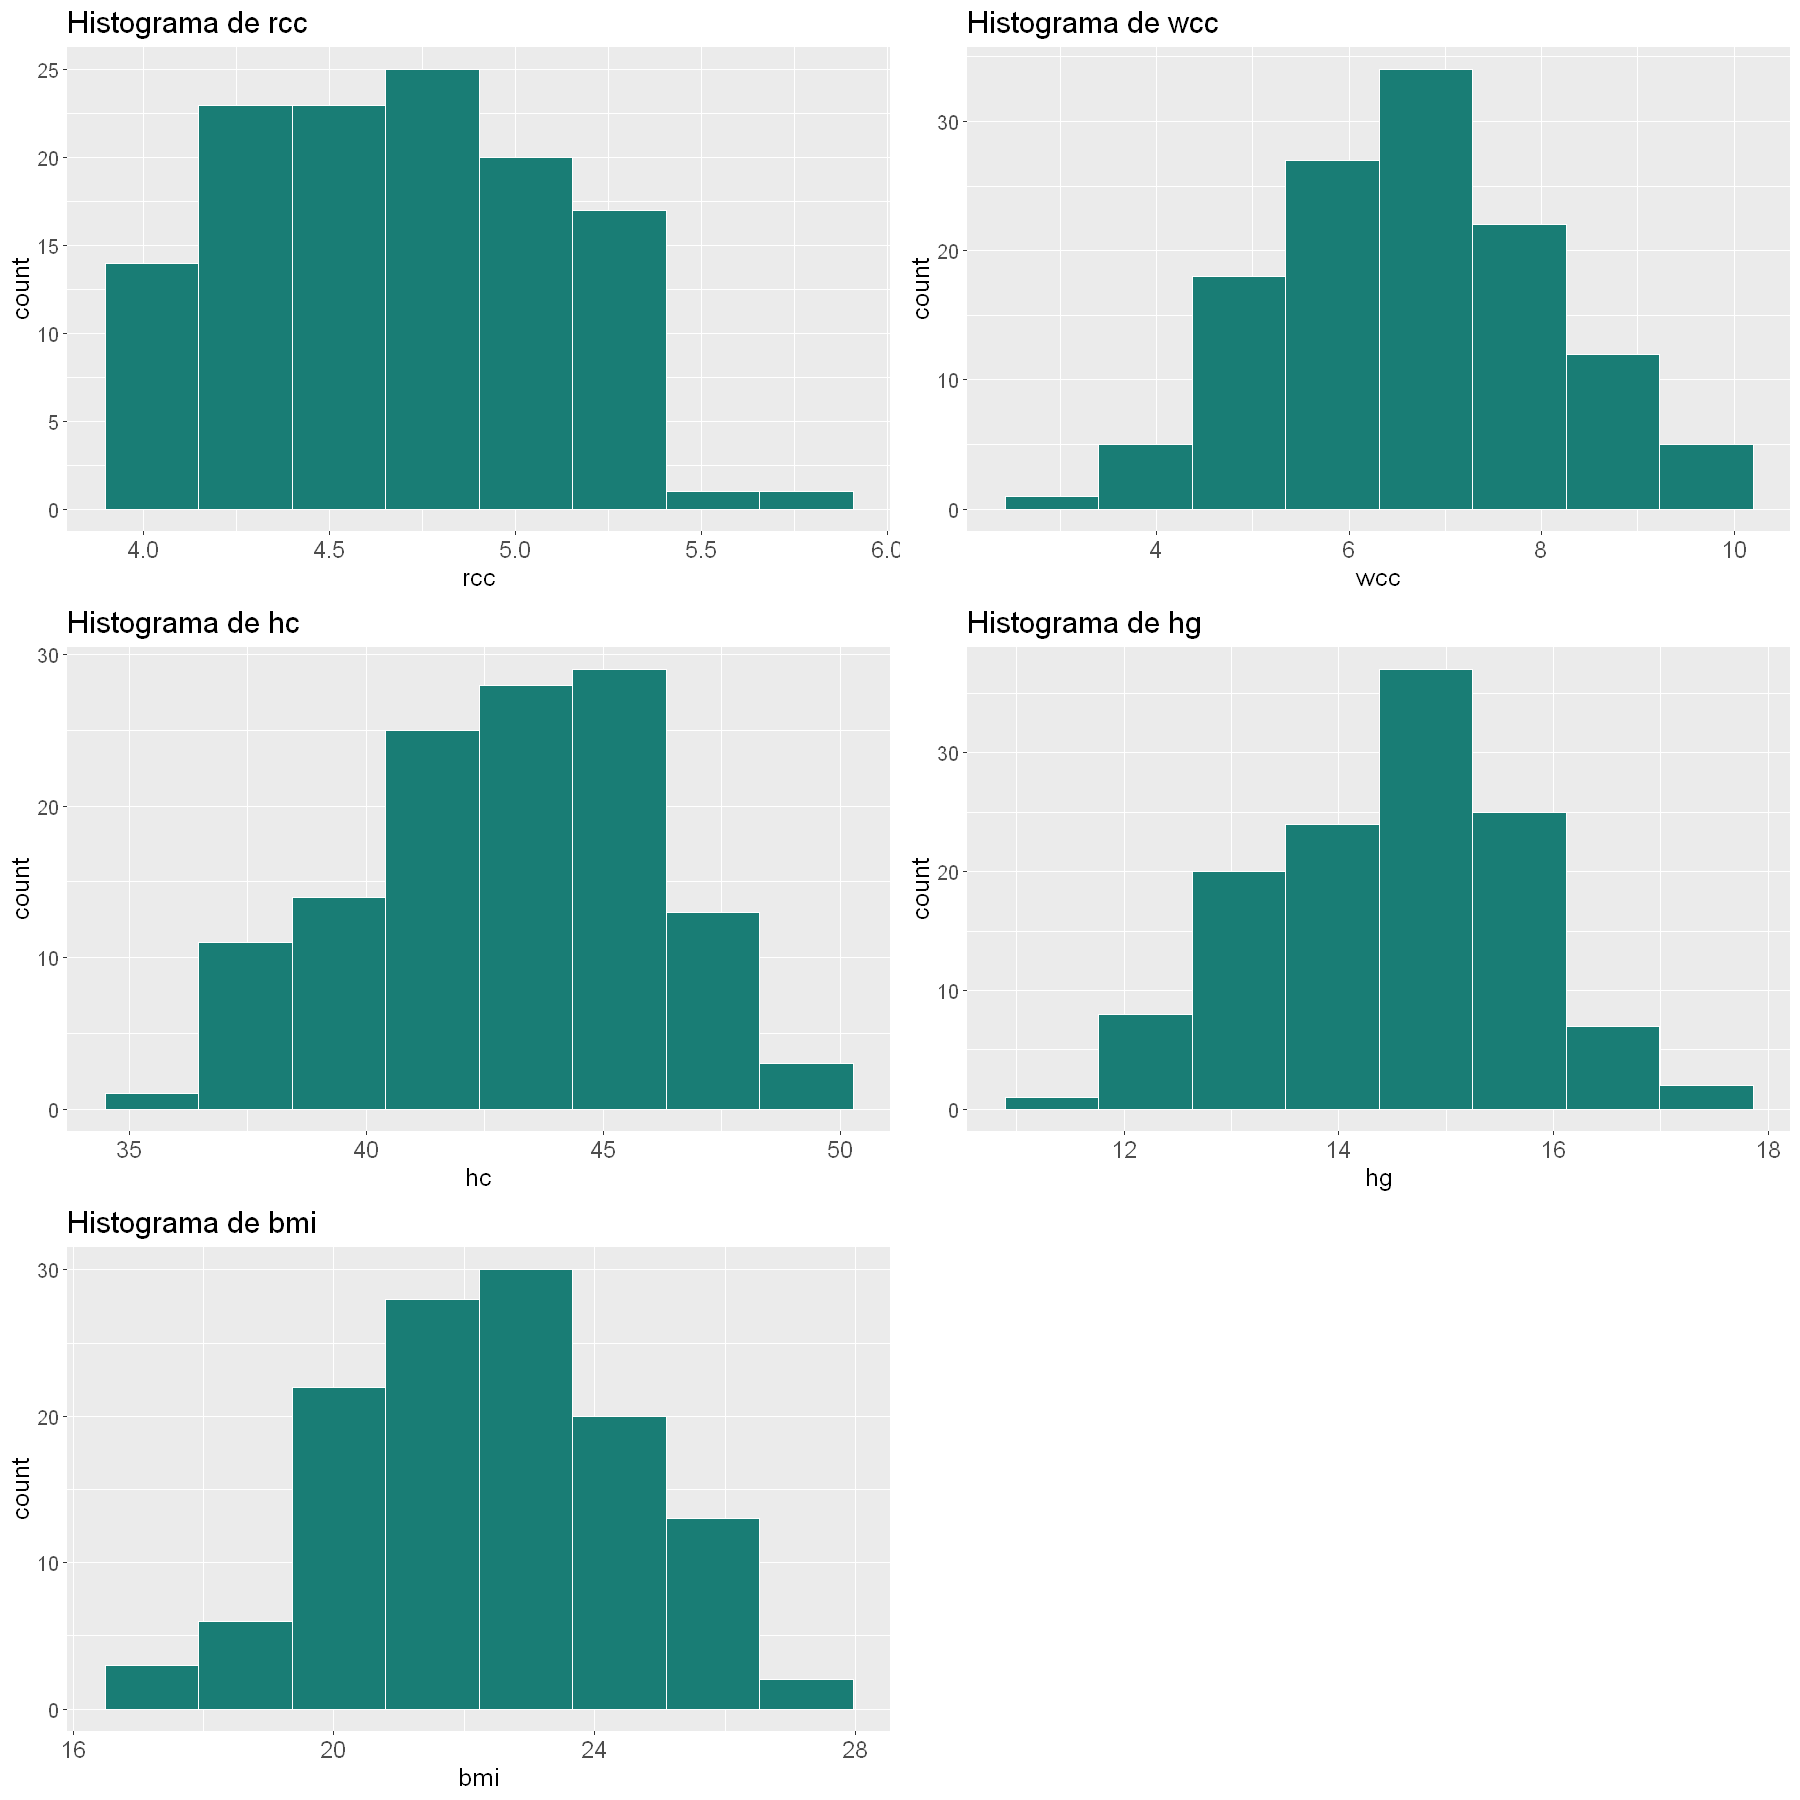

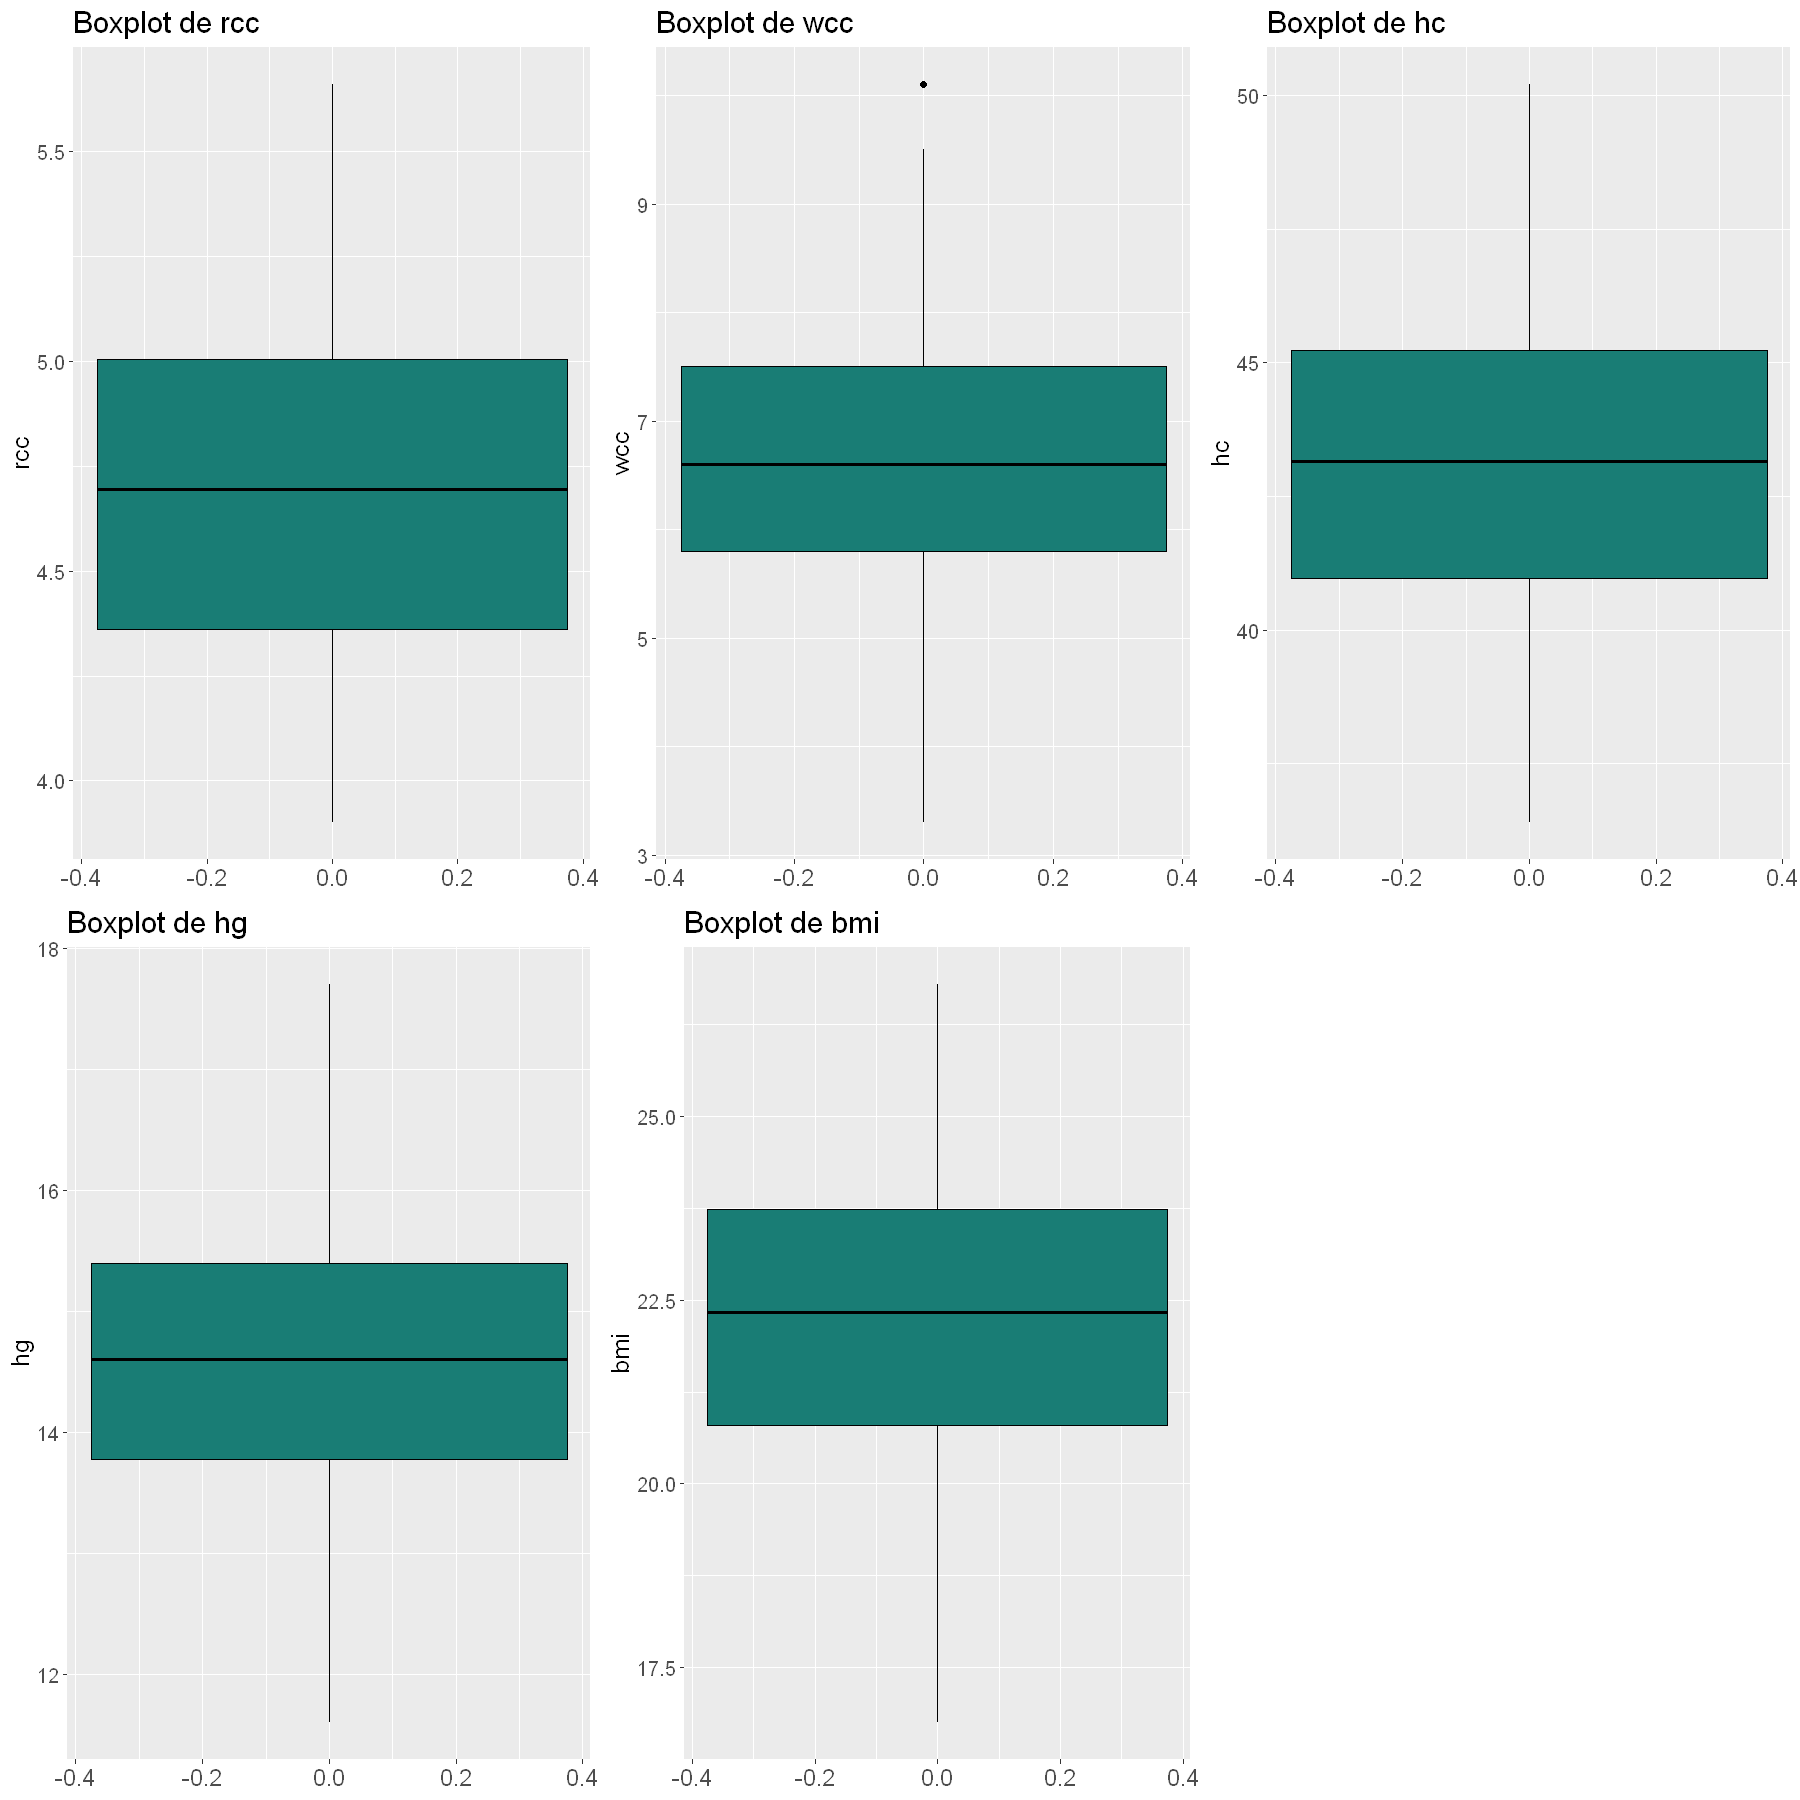

In [37]:
graficos_histograma = list()
graficos_boxplot = list()
variables <- c('rcc', 'wcc', 'hc', 'hg', 'bmi')
subconjunto_data2 <- data[, variables, drop = FALSE]

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)


# Histogramas

for (variable in variables) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#197D75', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Histograma de", variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 2))

#Boxplots

for (variable in names(subconjunto_data2)) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(y = variable) +
    geom_boxplot(fill = '#197D75', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))
  
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}


# Mostrar los boxplots en un grid
do.call('grid.arrange', c(graficos_boxplot, ncol = 3))

####
Comprobamos lo observado previamente, todas las distribuciones tienen forma normal y son simetricas, es decir, la media y mediana tienden a tener un valor cercano en cada una de ellas. No se observa presencia de valores atipicos (salvo un valor atipico en la variable wcc, a priori no es relevante).
Hagamos un analisis grafico respecto a la distribucion utilizando los qqplots:

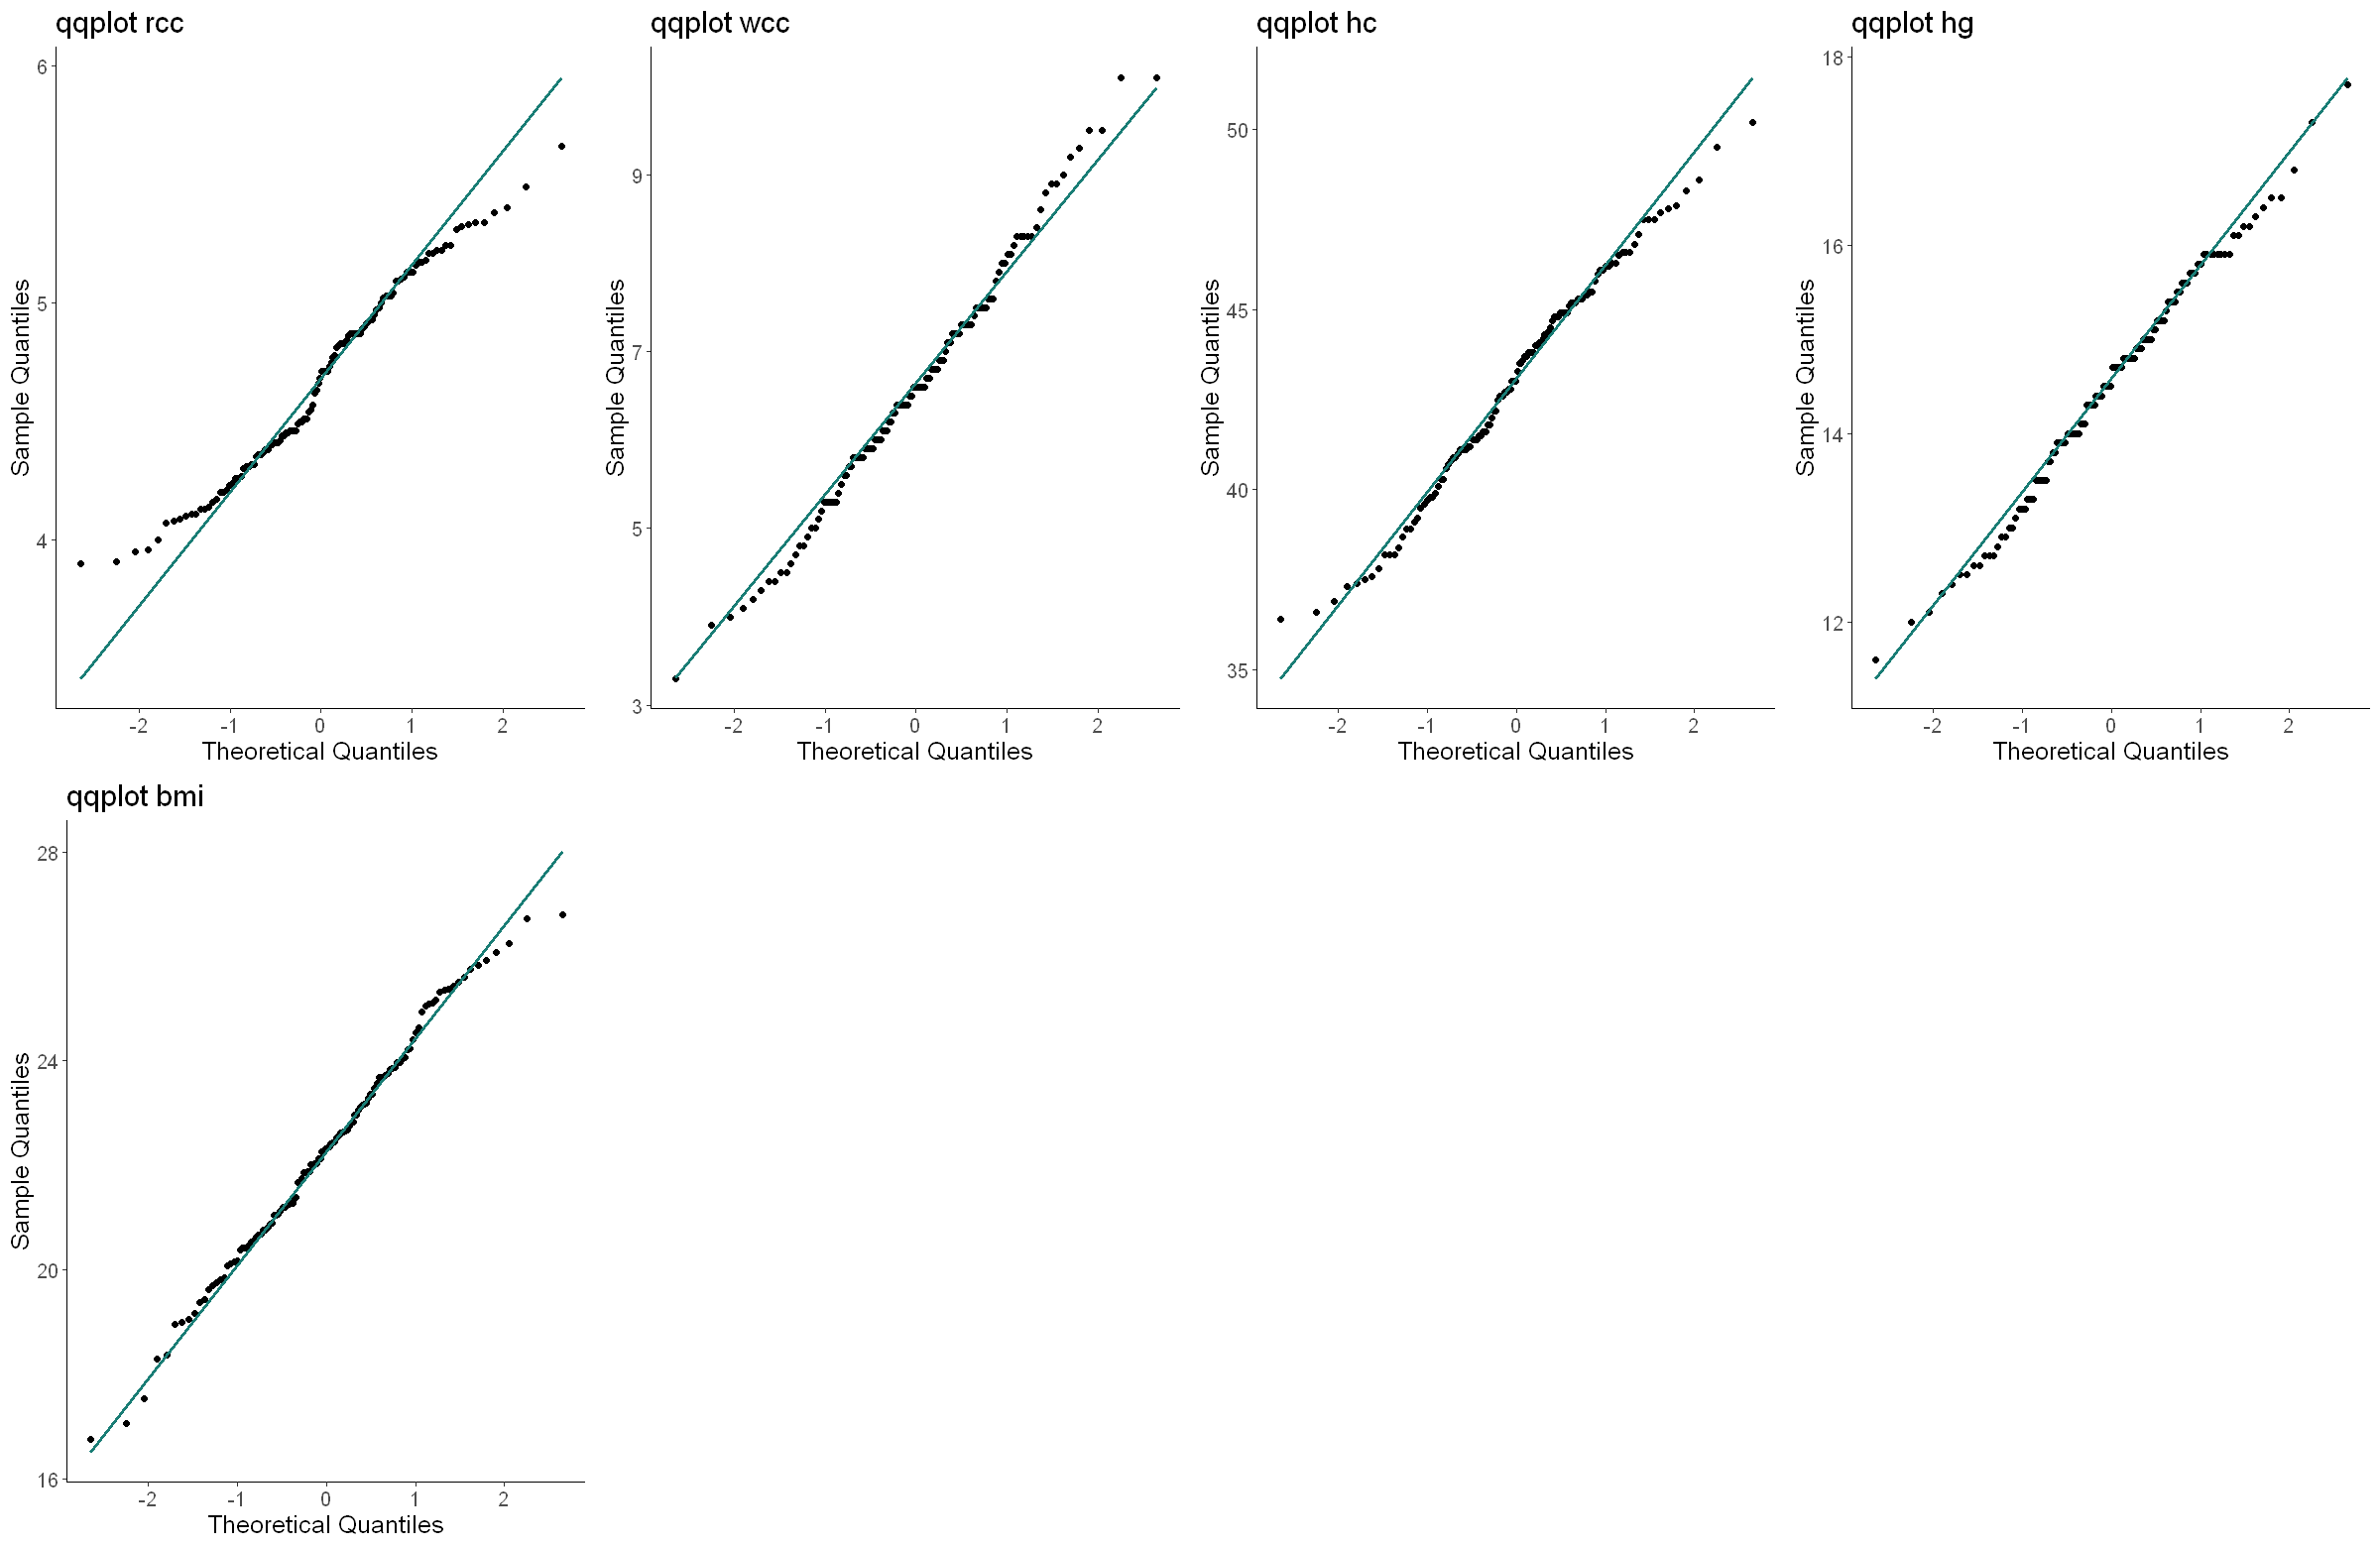

In [41]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13 
)

qq_plots = list()
var_data <- c('rcc', 'wcc', 'hc', 'hg', 'bmi')


for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data[!is.na(data[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#197D75', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

####
Ahora si, terminamos de definir que todas las variables tienen en promedio una distribucion normal simetrica.


#### <font color='#197D75'>  1.2 Variables categóricas </font>

####
Veamos como esta compuesta nuestra base de datos en funcion de nuestras variables categoricas:

In [7]:
# Convertir las columnas a factores si no están codificadas como factores y guardamos en col_cat
data$sport <- as.factor(data$sport)
data$sex <- as.factor(data$sex)
col_cat = c('sport','sex')

# Verificar el número de niveles
num_categorias <- sapply(data[, col_cat], function(x) length(levels(x)))
print(num_categorias)

# Crear una tabla de combinaciones
tabla_combinaciones <- table(data$sex, data$sport)
print(tabla_combinaciones)


sport   sex 
    5     2 
   
    B_Ball Row Swim T_400m Tennis
  f     13  22    9     11      7
  m     12  15   13     18      4


####
Podemos ver que tenemos 5 categorias para deportes, y 2 para sexo. Por otro lado, vemos que no hay un balance perfecto en nuestra base de datos, si bien poseemos la misma cantidad de datos para hombres y mujeres, no sucede lo mismo cuando hacemos el desgloce por deporte. Esto podria estar influyendo en los resultados de las relaciones cuando ampliamos por sexo y deporte.

####
Si bien a priori esto pareceria ser interesante, dado que hay una alta concentracion en los datos que tenemos, en principio, podemos decir que tambien nos generara una cierta complejidad a la hora de diferenciar por sexo y deporte, ya que al analizar toda la base de datos, no vemos mas que un conjunto de datos normales distribuidos simetricamente, sin outliers. Veamos como se relacionan estas variables en primer lugar entre ellas, y luego diferenciando por sexo y por deporte:

### <font color='#197D75'>  1.3 Analisis de matrices de correlaciones y covarianzas </font>

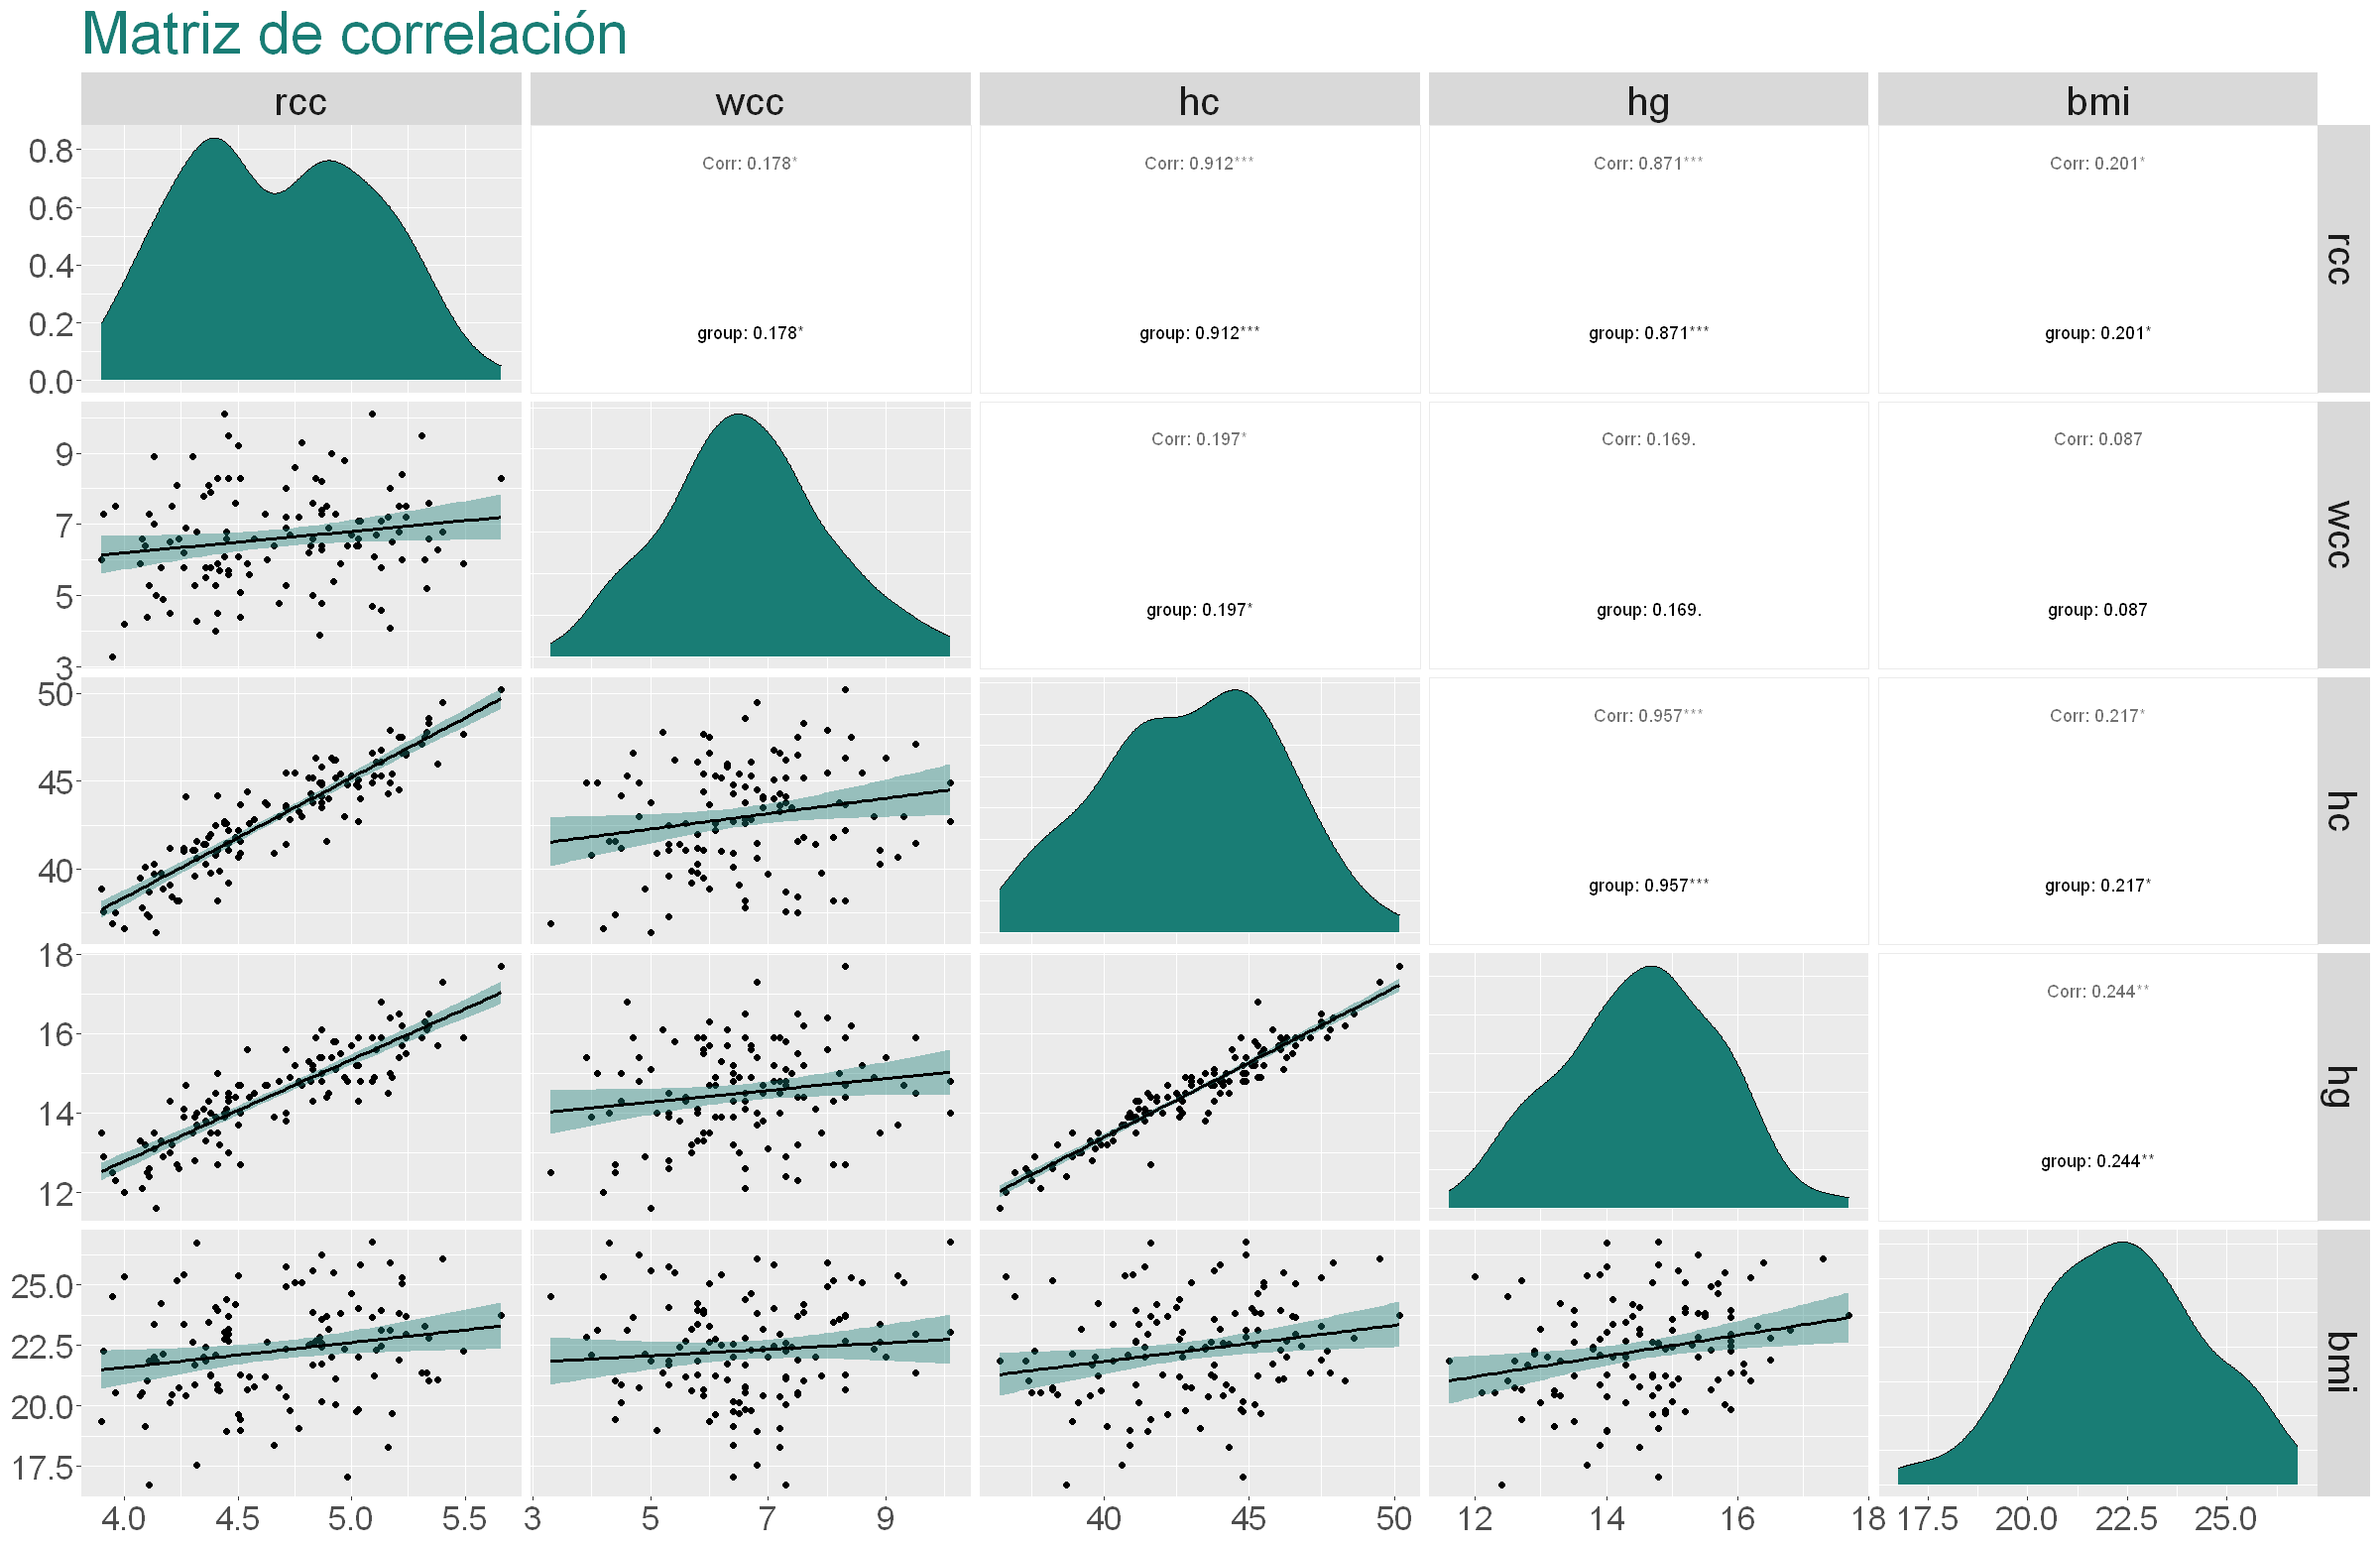

In [42]:
data1 <- data[, c('rcc', 'wcc', 'hc', 'hg', 'bmi')]

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

ggpairs(data1, 
        title = "Matriz de correlación",
        aes(fill = 'group', color = 'group', group = 1),  # Agrega la estética de grupo
        lower = list(continuous = ggally_smooth, combo = ggally_facethist, discrete = ggally_box),
        upper = list(continuous = ggally_cor),  # Ajusta el tamaño del texto de la correlación
        diag = list(continuous = ggally_densityDiag, discrete = ggally_barDiag),
        progress = FALSE) +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25),
  plot.title = element_text(color = "#197D75")
) +
scale_fill_manual(values = "#197D75") +
scale_color_manual(values = "black")


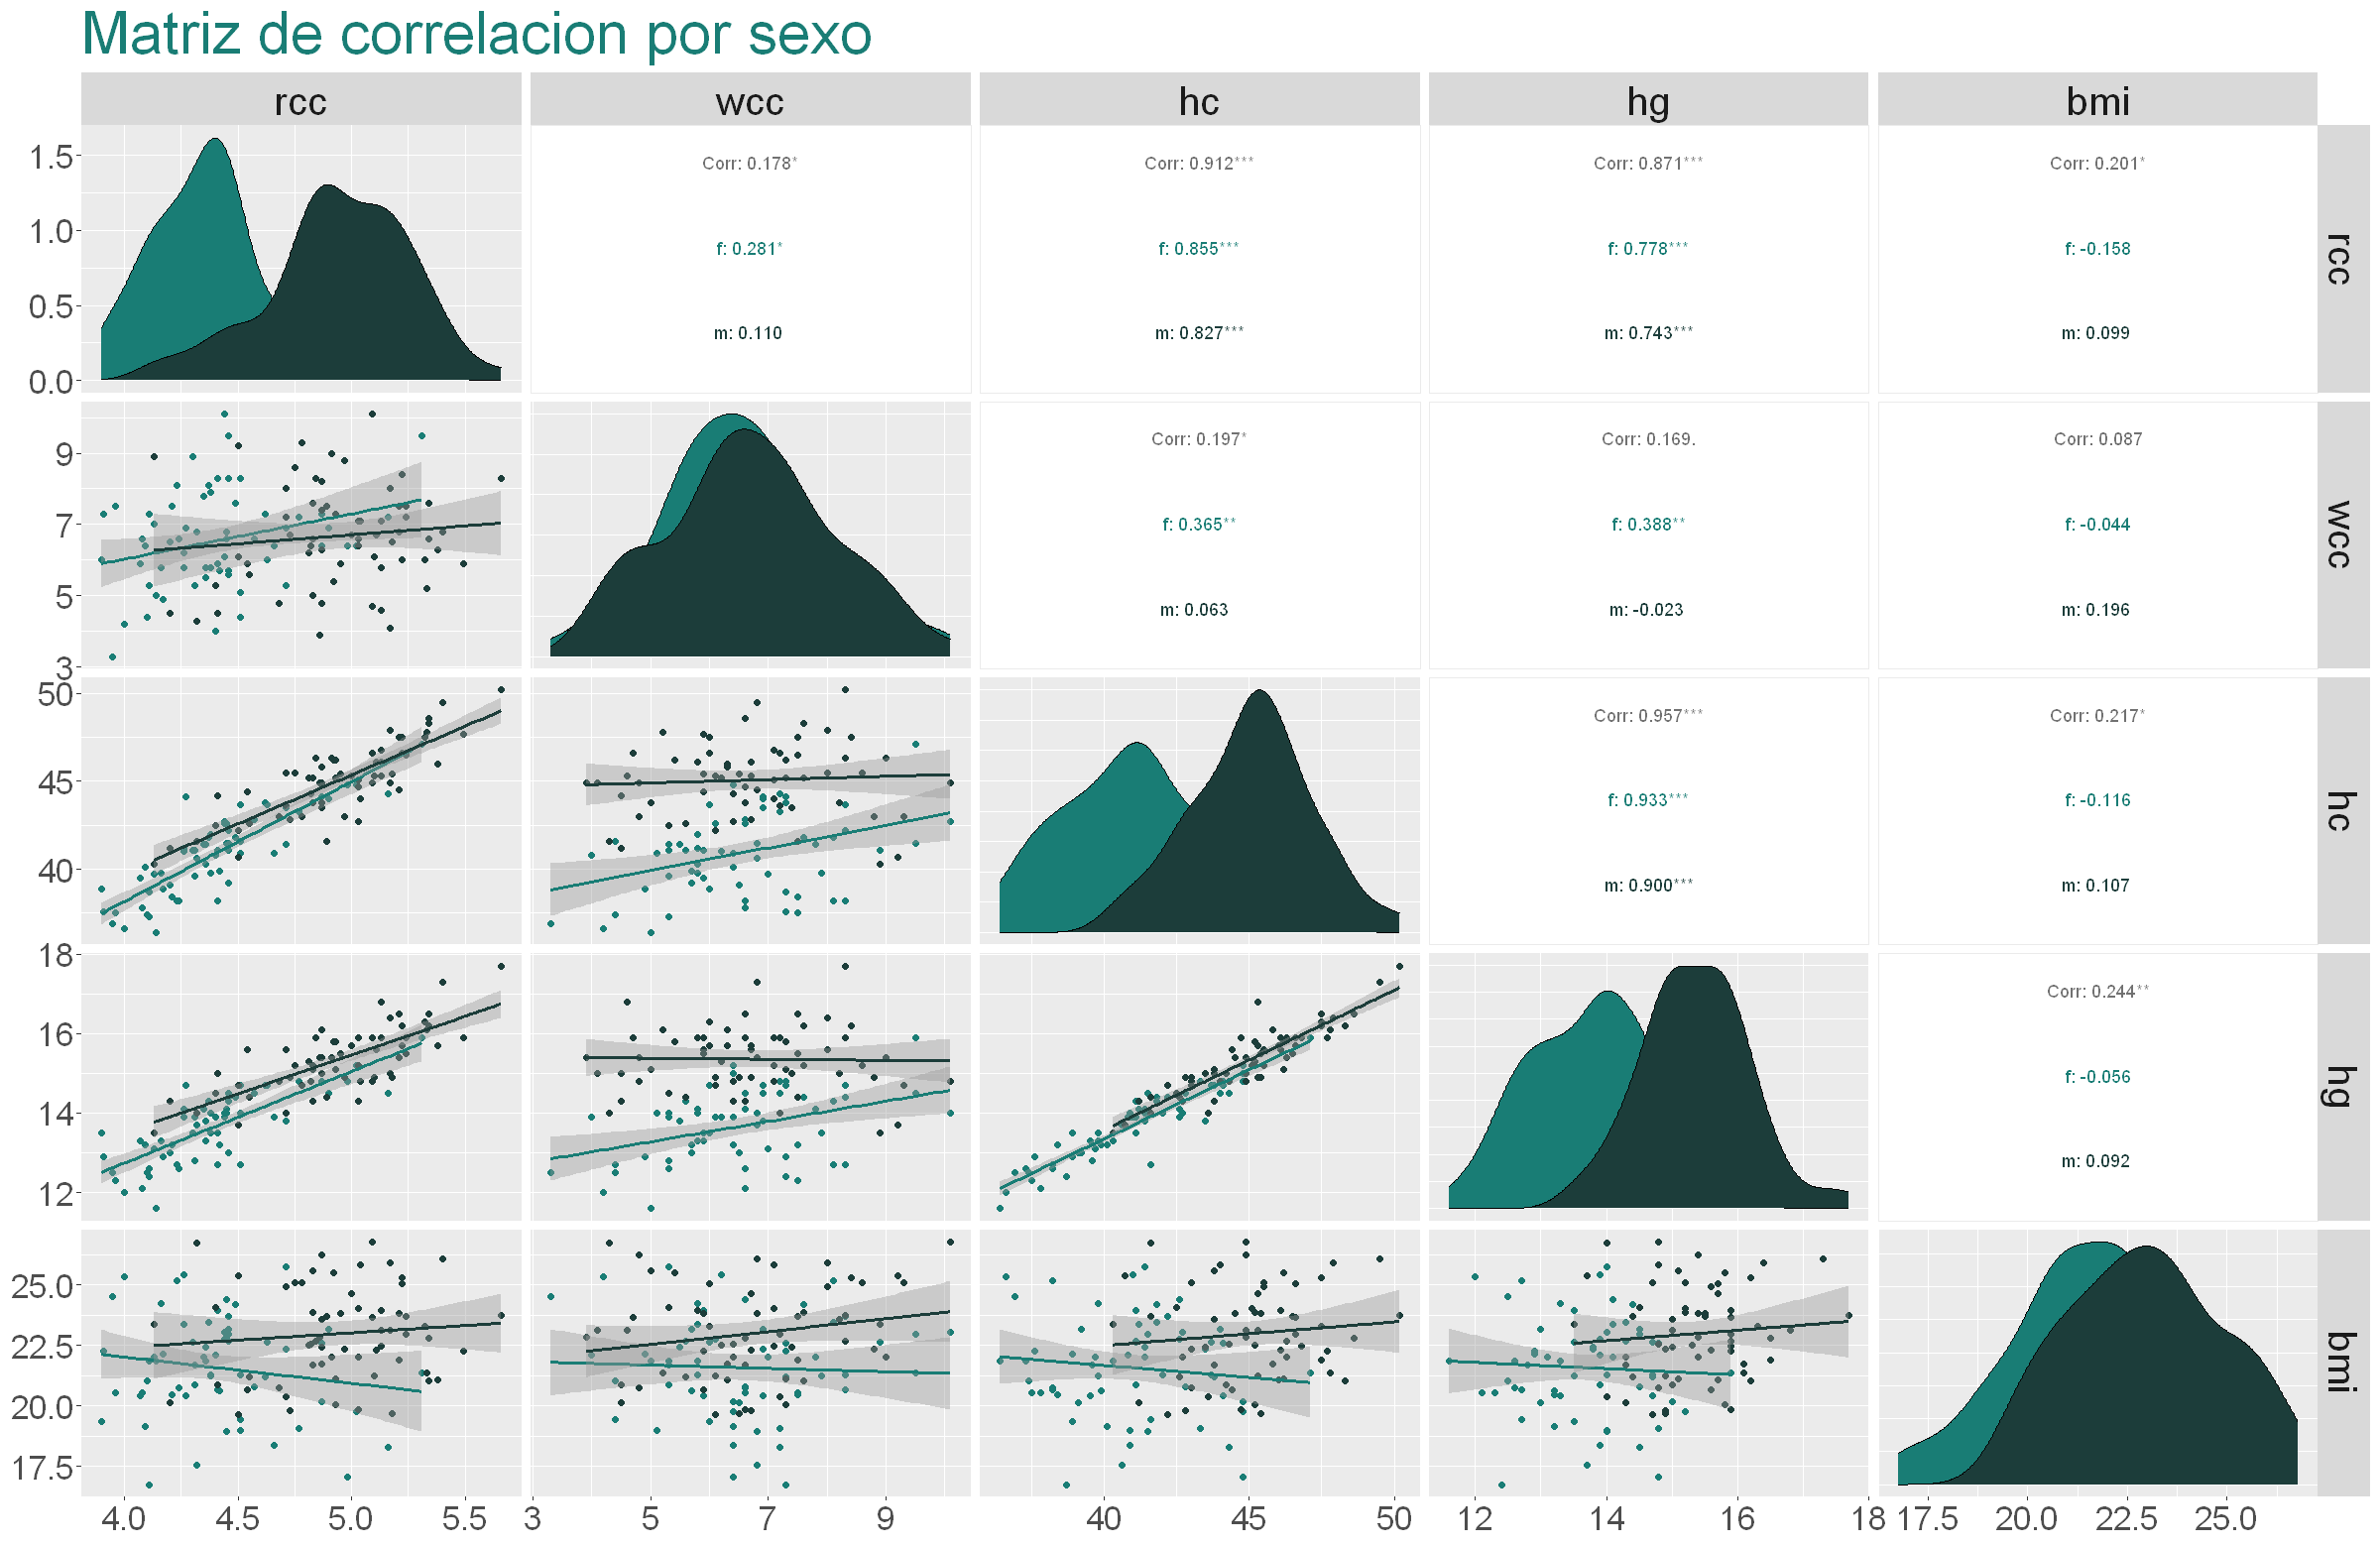

In [43]:
data2 <- data[, c('sex','rcc', 'wcc', 'hc', 'hg', 'bmi')]

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

ggpairs(data2, 
        aes(color = as.factor(sex)),   # Asigna el color según la variable 'sex'
        title = "Matriz de correlacion por sexo",
        lower = list(continuous = ggally_smooth, combo = ggally_facethist, discrete = ggally_box),
        upper = list(continuous = ggally_cor),  # Ajusta el tamaño del texto de la correlación
        diag = list(continuous = ggally_densityDiag, discrete = ggally_barDiag),
        columns = 2:ncol(data2),
        progress = FALSE) +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25),
  plot.title = element_text(color = "#197D75")
) +
scale_fill_manual(values = c("#197D75", '#1C3D3A')) +
scale_color_manual(values = c("#197D75", '#1C3D3A'))



####
Esta visualización nos permite examinar las correlaciones entre todas las variables, diferenciadas por género. Observamos que no todas las variables muestran correlaciones significativas entre sí. Por ejemplo, los Globulos Rojos (rcc) exhiben una relación alta y significativa con los hematocritos (hc) (0.912, p-value < 0.05), donde la relación es consistente entre mujeres (0.855) y hombres (0.827), ambos con niveles de significatividad similares. Asimismo, rcc presenta una correlación significativa y positiva con la Concentración de hemoglobina (hg) (0.871, p-value < 0.05), con relaciones específicas para mujeres (0.778) y hombres (0.743), ambos con niveles de significatividad similares.

Por otro lado, los Hematocritos (hc) y la Concentración de hemoglobina (hg) presentan una correlación positiva significativa con un valor de 0.957 y un p-value < 0.05, manteniendo la consistencia entre mujeres (0.933) y hombres (0.990), ambos con niveles de significatividad similares.

A un nivel de significatividad menor, encontramos la relación entre la Concentración de hemoglobina (hg) y el Índice de masa corporal (bmi). Sin embargo, al desglosar esta correlación por género, la significatividad disminuye y la dirección de la correlación cambia, siendo negativa y cercana a cero para las mujeres, mientras que es positiva y cercana a cero para los hombres. Dada esta variabilidad, optaremos por ser estrictos en el nivel de significatividad buscado y nos enfocaremos en las relaciones inicialmente mencionadas.

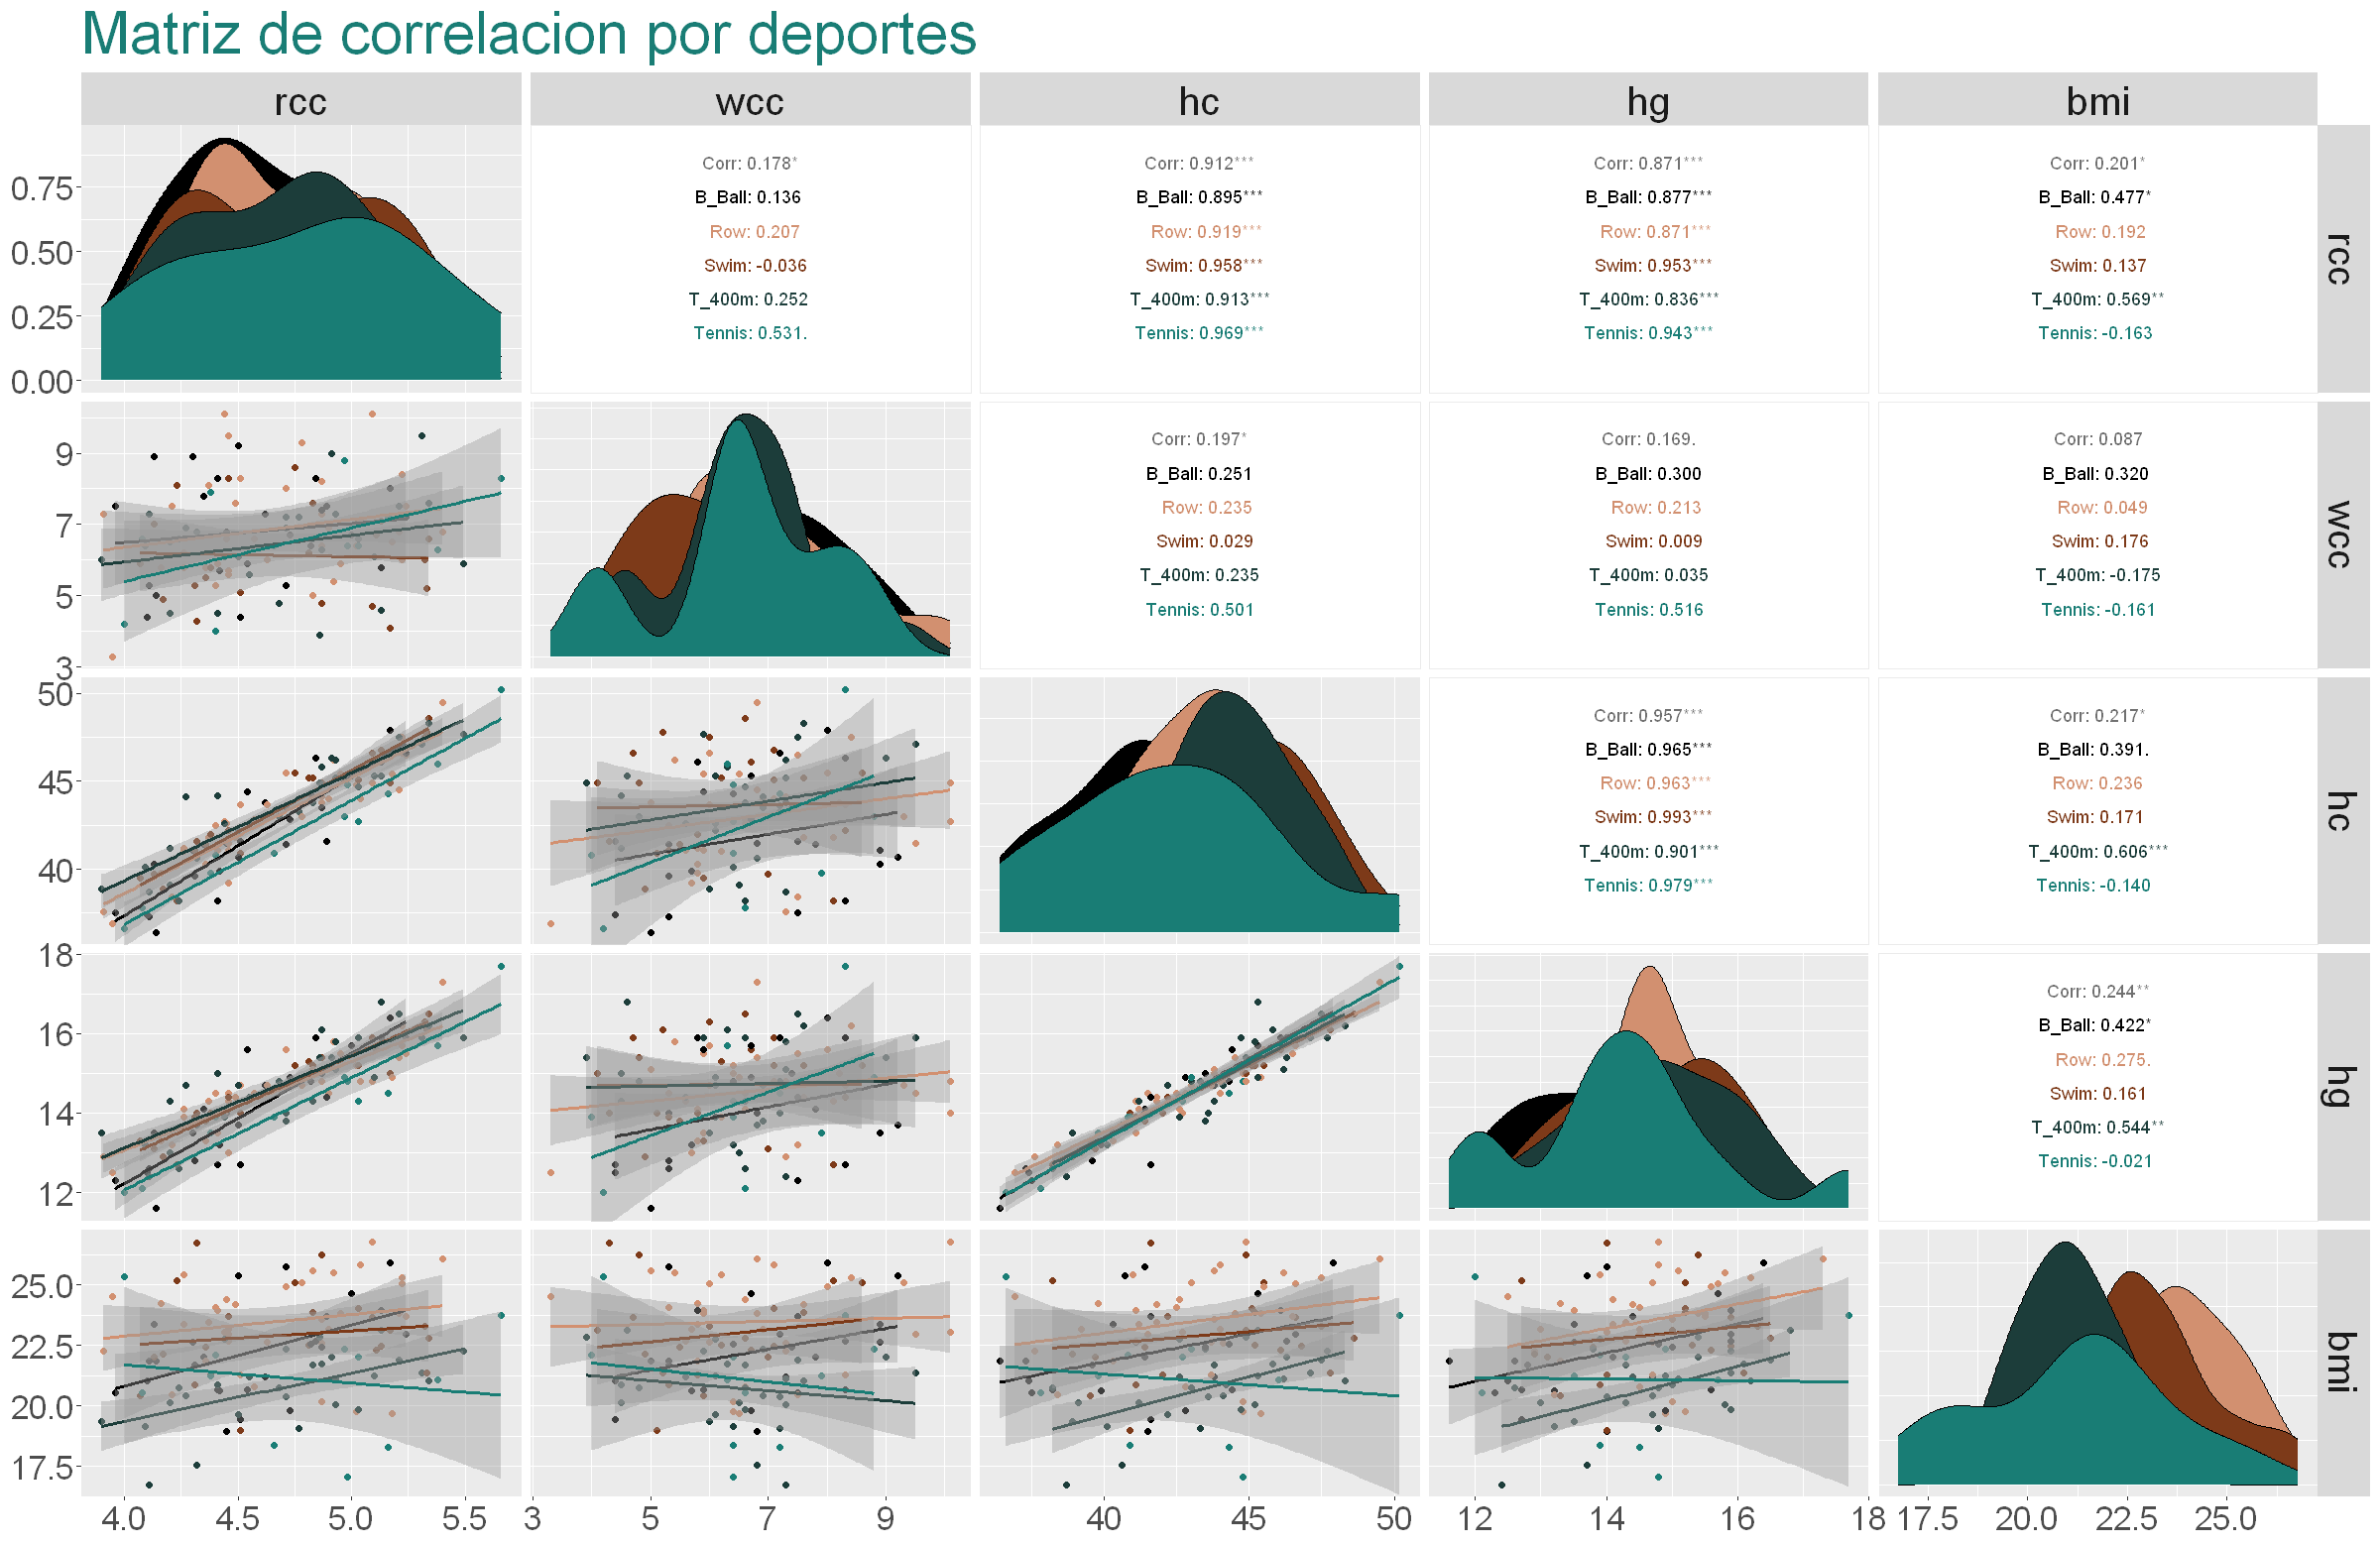

In [44]:
data3 <- data[, c('sport','rcc', 'wcc', 'hc', 'hg', 'bmi')]

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

ggpairs(data3, 
        aes(color = as.factor(sport)),   # Asigna el color según la variable 'sport'
        title = "Matriz de correlacion por deportes",
        lower = list(continuous = ggally_smooth, combo = ggally_facethist, discrete = ggally_box),
        upper = list(continuous = ggally_cor),  # Agrega las correlaciones en la parte superior se puede probar tmb covarianza
        diag = list(continuous = ggally_densityDiag, discrete = ggally_barDiag),
        columns = 2:ncol(data3),  # Excluye la columna 'sport' de las columnas
        progress = FALSE) +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25),
  plot.title = element_text(color = "#197D75")
) +
scale_fill_manual(values = rev(c("#197D75", '#1C3D3A', '#7D3A19', '#D29070', '#000000'))) +
scale_color_manual(values = rev(c("#197D75", '#1C3D3A', '#7D3A19', '#D29070', '#000000')))


####
En este gráfico combinado, reforzamos las observaciones previas sobre las correlaciones entre variables, ahora diferenciadas por deporte. Notamos que no todas las variables presentan correlaciones significativas entre sí. Por ejemplo, los Globulos Rojos (rcc) muestran una relación fuerte y significativa con los hematocritos (hc) (0.912, p-value < 0.05), siendo esta relación coherente en todos los deportes y con niveles de significatividad similares. Además, rcc exhibe una correlación significativa y positiva con la Concentración de hemoglobina (hg) (0.871, p-value < 0.05), con relaciones específicas para cada deporte, como B_Ball (0.877), Row (0.871), Swim (0.953), T_400m (0.836), y Tenis (0.943), todas con niveles de significatividad similares.

En cuanto a los Hematocritos (hc) y la Concentración de hemoglobina (hg), mantienen una correlación positiva significativa con un valor de 0.957 y un p-value < 0.05, mostrando coherencia entre los distintos deportes y con niveles de significatividad similares.

Como observamos previamente, a un nivel de significatividad menor, encontramos la relación entre la Concentración de hemoglobina (hg) y el Índice de masa corporal (bmi). Sin embargo, al desglosar esta correlación por deporte, la significatividad disminuye para la mayoría, excepto para B_Ball y Tenis, donde se mantiene e incluso aumenta su magnitud. En línea con las observaciones anteriores, optaremos por no incluir este tipo de variables en nuestros modelos dada la variabilidad en sus relaciones.

### <font color='#197D75'>  2. Analysis of Variance (ANOVA) </font>

####
El análisis de varianza (ANOVA) se basa en varios supuestos clásicos. Es importante tener en cuenta que violaciones a estos supuestos pueden afectar la validez de los resultados del ANOVA. Los supuestos clásicos del ANOVA son:

<font color='#197D75'> 1. **Normalidad de los Residuos:** </font> Los residuos (diferencias entre los valores observados y los valores predichos) deben seguir una distribución normal. Esto se verifica típicamente mediante gráficos de residuos o pruebas estadísticas como la prueba de normalidad de Shapiro-Wilk.

<font color='#197D75'> 2. **Homogeneidad de las Varianzas (Homocedasticidad):** </font>La varianza de los residuos debe ser constante en todos los niveles de la variable independiente. Puedes evaluar esto visualmente mediante gráficos de dispersión de residuos o estadísticamente mediante pruebas formales como la prueba de Levene, la prueba de Breusch Pagan o la prueba de Bartlett.

Antes de realizar un ANOVA, se recomienda verificar estos supuestos para asegurarse de que los resultados del análisis sean confiables. En caso de violación de estos supuestos, se pueden explorar alternativas o transformaciones de datos para abordar estas cuestiones.


#### <font color='#197D75'>  2.1 Normalidad </font>

#####
Que nuestros residuos sigan una distribucion normal significa que los estimadores calculados mediante MCO tienen propiedades estadísticas deseables, como ser insesgados y eficientes.

<font color='#197D75'>**Prueba estadística:** </font> la prueba de Shapiro-wilk sobre los residuos (muestras con pocas observaciones).

H0: La variable presenta una distribución normal
<br>
H1: La variable presenta una distribución no normal


Sig(p valor) > 0.05: No rechazar H0 (normal)
<br>
Sig(p valor) < 0.05: Rechazar H0

##### <font color='#197D75'>  2.1.1 Normalidad en categoria 'sex' (ANOVA) </font>

In [11]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data2, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


##### <font color='#197D75'>  2.1.2 Normalidad en categoria 'sport' (ANOVA) </font>

In [12]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data3, sport == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

    Variable    Cat   Shapiro PValor
W        rcc B_Ball 0.9668856  0.568
W1       rcc    Row 0.9659142  0.309
W2       rcc   Swim 0.9164542  0.064
W3       rcc T_400m 0.9755527  0.717
W4       rcc Tennis 0.9602871  0.775
W5       wcc B_Ball 0.9627397  0.472
W6       wcc    Row 0.9608115  0.214
W7       wcc   Swim 0.9621063  0.533
W8       wcc T_400m 0.9536983  0.228
W9       wcc Tennis 0.9146806  0.277
W10       hc B_Ball 0.9677765  0.589
W11       hc    Row 0.9884984  0.962
W12       hc   Swim 0.9381614  0.181
W13       hc T_400m 0.9613755  0.355
W14       hc Tennis 0.9783319  0.956
W15       hg B_Ball 0.9583881  0.383
W16       hg    Row 0.9782721  0.671
W17       hg   Swim 0.9457531  0.260
W18       hg T_400m 0.9780738  0.787
W19       hg Tennis 0.9399817  0.520
W20      bmi B_Ball 0.9694488  0.631
W21      bmi    Row 0.9622123  0.237
W22      bmi   Swim 0.9827718  0.954
W23      bmi T_400m 0.9578281  0.290
W24      bmi Tennis 0.9655063  0.838


####
El supuesto de normalidad se cumple para todas las combinaciones posibles, excepto para la combinacion (rcc, f).

#### <font color='#197D75'>  2.2 Homocedasticidad </font>

#####
La homocedasticidad es una propiedad que deseamos en nuestros modelos estadísticos, especialmente en los modelos de regresión. En términos sencillos, significa que la varianza de los errores del modelo debe ser constante a medida que cambian las variables que estamos estudiando. Para comprobar la homocedasticidad haremos dos cosas. La primera, generaremos una visualizacion de los residuos en comparacion con los valores ajustados. En segundo lugar, haremos un test estadistico llamado prueba de Bartlett, quien nos confiramara la presencia o no de homocedasticidad en los errores de cada modelo.

El test de Bartlett es una prueba estadística utilizada para evaluar la homocedasticidad, es decir, la igualdad de varianzas entre diferentes muestras. En el contexto de este test, se plantean las siguientes hipótesis:

Hipótesis Nula (H0): Las muestras provienen de poblaciones con varianzas iguales.

Hipótesis Alternativa (H1): Las muestras provienen de poblaciones con varianzas distintas.

En otras palabras, el test de Bartlett busca determinar si la variabilidad dentro de cada grupo es estadísticamente similar. Si el valor-p asociado con el test es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula, indicando que al menos una de las muestras tiene una varianza significativamente diferente de las demás.

##### <font color='#197D75'>  2.2.1 Homocedasticidad en categoria 'sex' (ANOVA) </font>

In [13]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data2)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


##### <font color='#197D75'>  2.2.2 Homocedasticidad en categoria 'sport' (ANOVA) </font>

In [14]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sport, data = data3)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable
                                                              , Estadistico = resultado_bartlett$statisti
                                                              , PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   2.7209300 0.6055571
Bartlett's K-squared1      wcc   0.9647336 0.9150955
Bartlett's K-squared2       hc   2.4492440 0.6537469
Bartlett's K-squared3       hg   5.1199980 0.2752051
Bartlett's K-squared4      bmi   4.3053131 0.3662603


#####
Hay homocedasticidad para todos los grupos, no tenemos evidencia suficiente para rechazar la hipotesis nula en ningun caso. 

#### <font color='#197D75'>  3. Analysis of Variance - One Way </font>

El ANOVA One Way (un solo factor), se utiliza para comparar las medias de una variable continua dependiente, respecto de una variable categorica. Nos ayuda a determinar si hay diferencias significativas entre las categorias de los grupos respecto a la distribucion de la variable continua dependiente. La idea principal es verificar si, en promedio, al menos un grupo es diferente de los demás.

La hipótesis nula de dicho test, asume que todas las medias de los grupos son iguales, mientras que la hipótesis alternativa sugiere que al menos una media es diferente. La prueba ANOVA evalúa si las variaciones entre las medias de los grupos son estadísticamente significativas en comparación con las variaciones dentro de los propios grupos.

Cuando rechazamos la hipótesis nula, indicamos que al menos un grupo tiene una media significativamente diferente, pero la prueba ANOVA por sí sola no nos dice cuál es ese grupo. ANOVA One Way nos ayuda a entender si hay diferencias significativas entre las medias de los grupos, proporcionando una visión general de la variabilidad en los datos y señalando la necesidad de investigar más a fondo las diferencias específicas mediante pruebas adicionales.

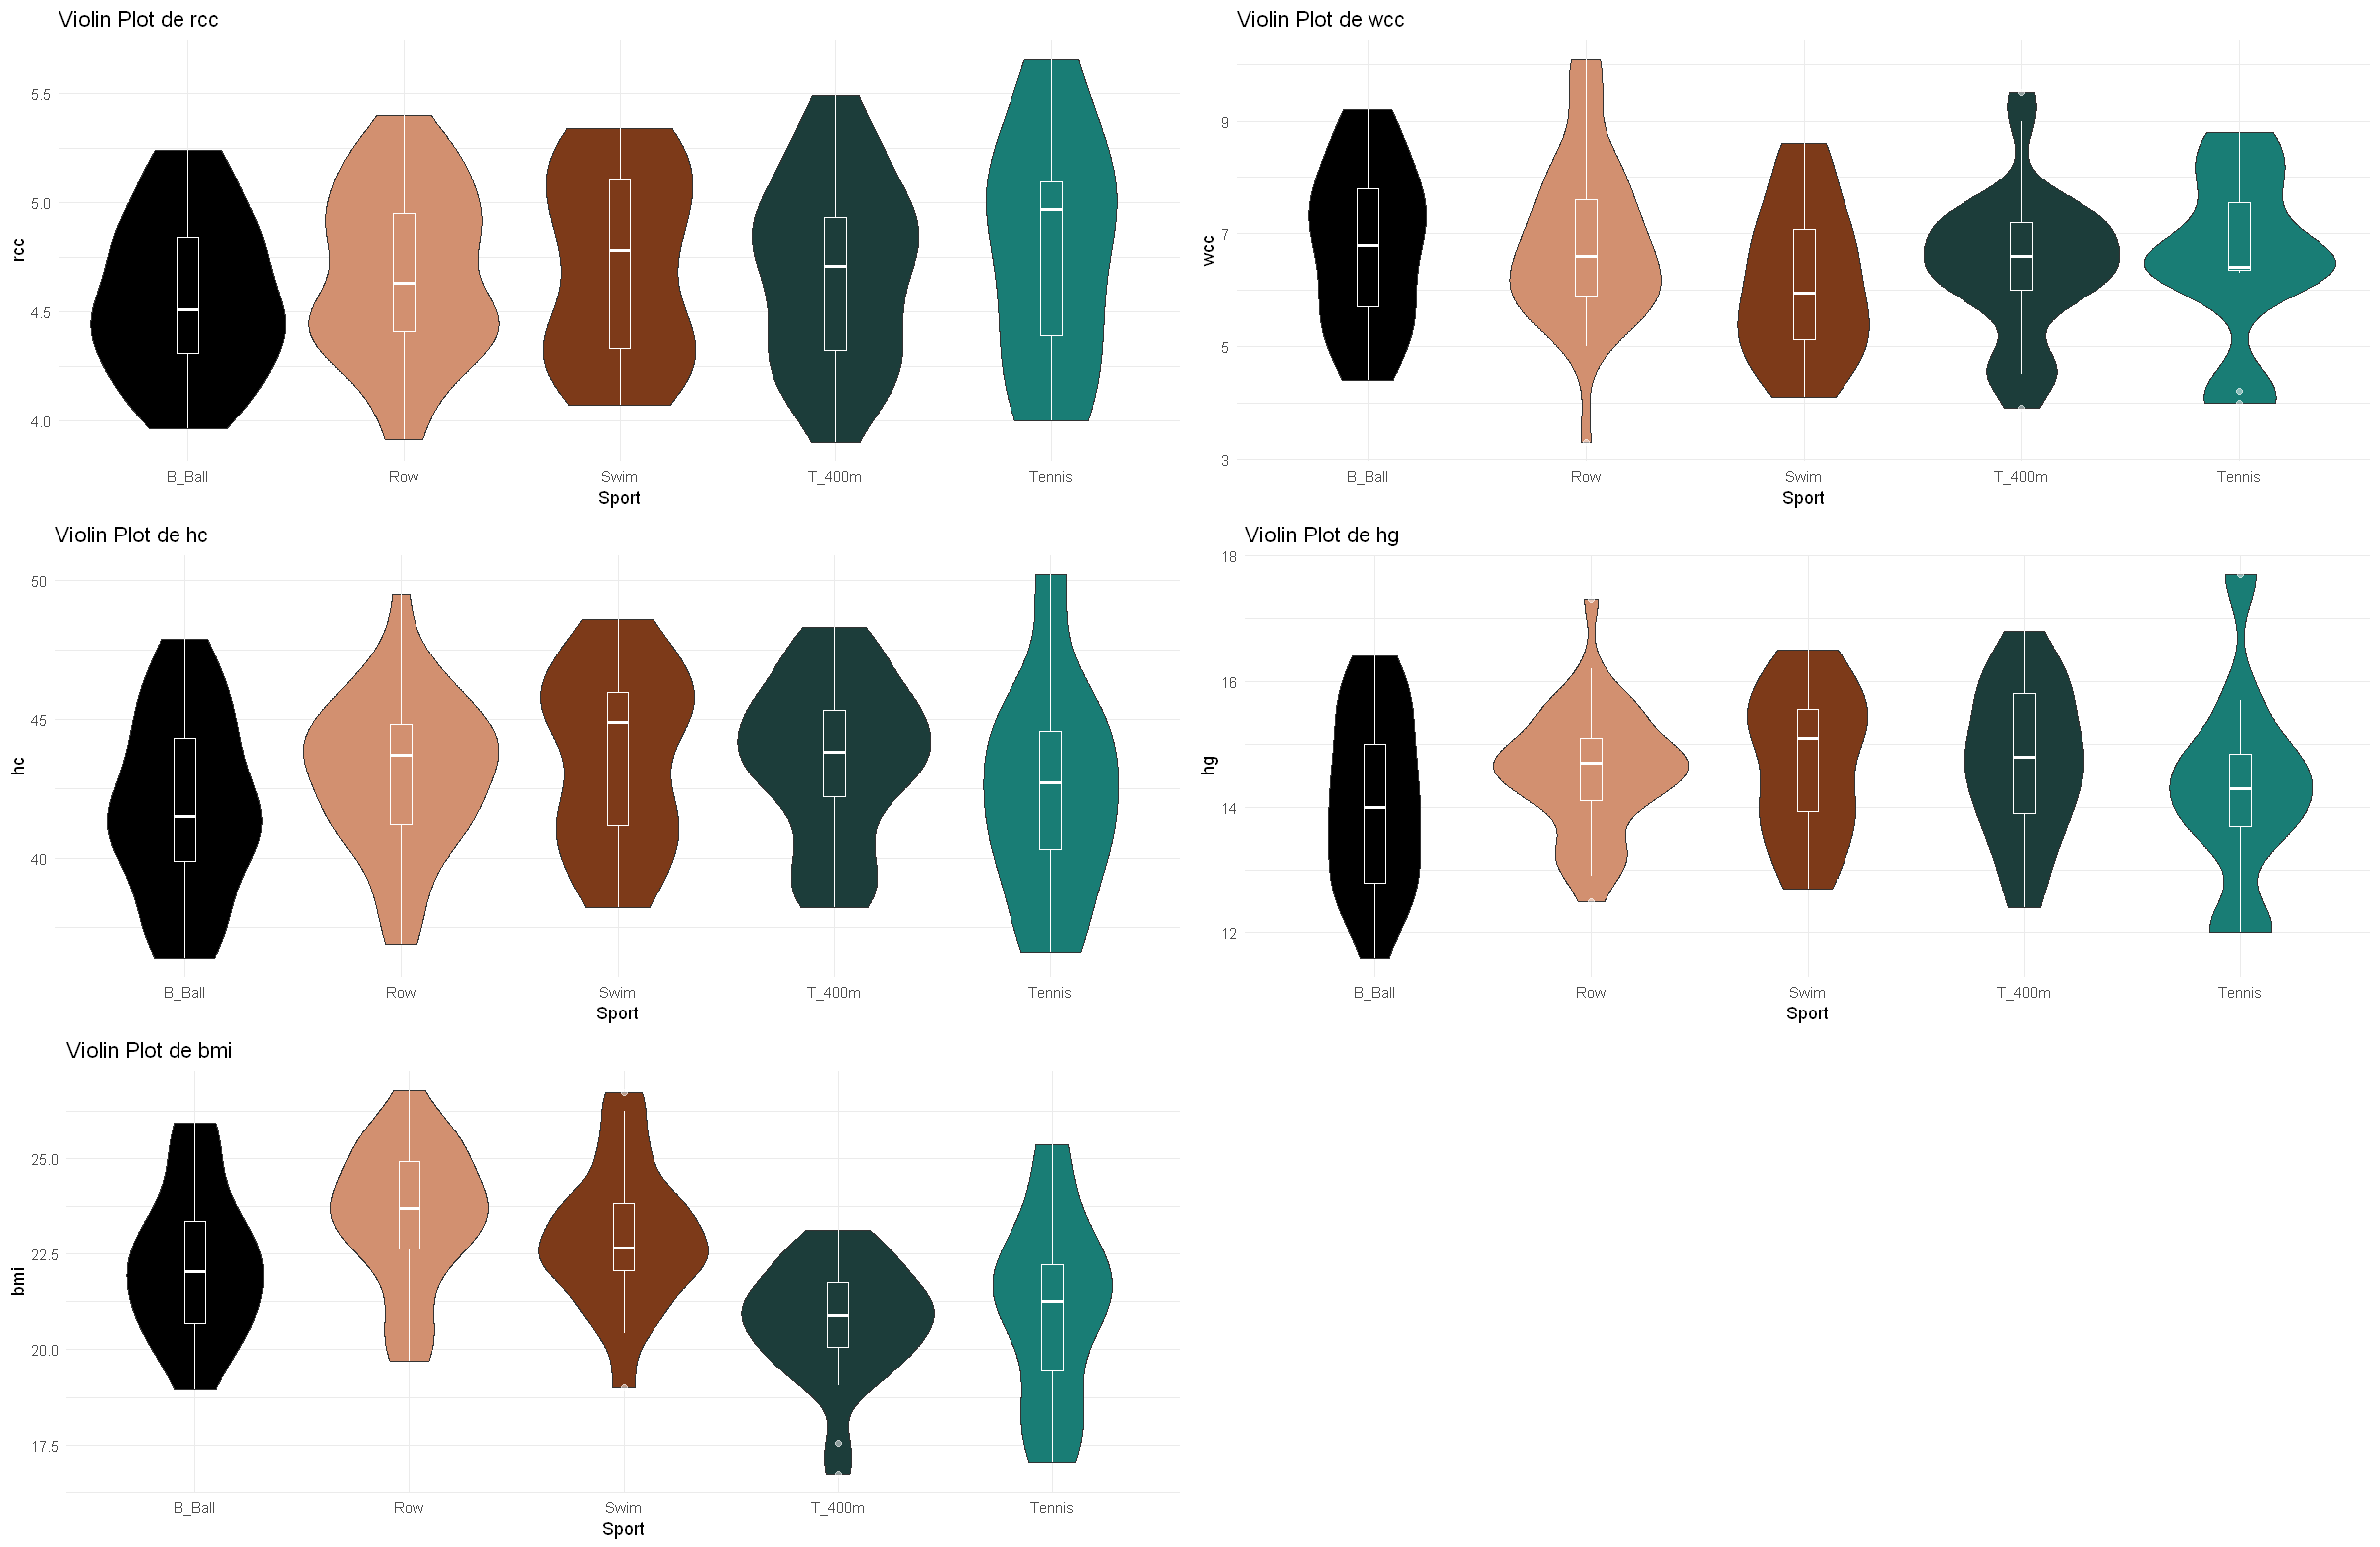

In [27]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13 
)


data3 <- data[, c('sport', 'rcc', 'wcc', 'hc', 'hg', 'bmi')]
data3$sport <- factor(data3$sport)

# Grafico de violin para todas las categorias de sport respecto a bmi
create_boxplot <- function(variable) {
  ggplot(data3, aes(x = sport, y = get(variable), fill = sport)) +
    geom_violin() +
    geom_boxplot(width = 0.1, color = "white", alpha = 0.5) +  # Añade líneas blancas alrededor de los boxplots
    labs(title = paste("Violin Plot de", variable),
         x = "Sport",
         y = variable) +
    theme_minimal() +
    theme(legend.position="none") +  # Para ocultar la leyenda de colores
    scale_fill_manual(values = rev(c("#197D75", '#1C3D3A', '#7D3A19', '#D29070', '#000000')))  # Define los colores
}

# Lista para almacenar cada boxplot
boxplots_list <- lapply(c('rcc', 'wcc', 'hc', 'hg', 'bmi'), create_boxplot)

# Crear un grid array con los boxplots
grid.arrange(grobs = boxplots_list, ncol = 2)


####
En el analisis grafico podemos observar que, en general, no hay una diferencia muy grande en las distribuciones por deporte para cada variable continua. La que mayor diferencia visual representa es la variable 'bmi', pero para poder confirmar esto debemos hacer un analisis ANOVA y ver si tenemos evidencia suficiente como para rechazar la hipotesis nula e indicar que hay una diferencia entre medias significativa.

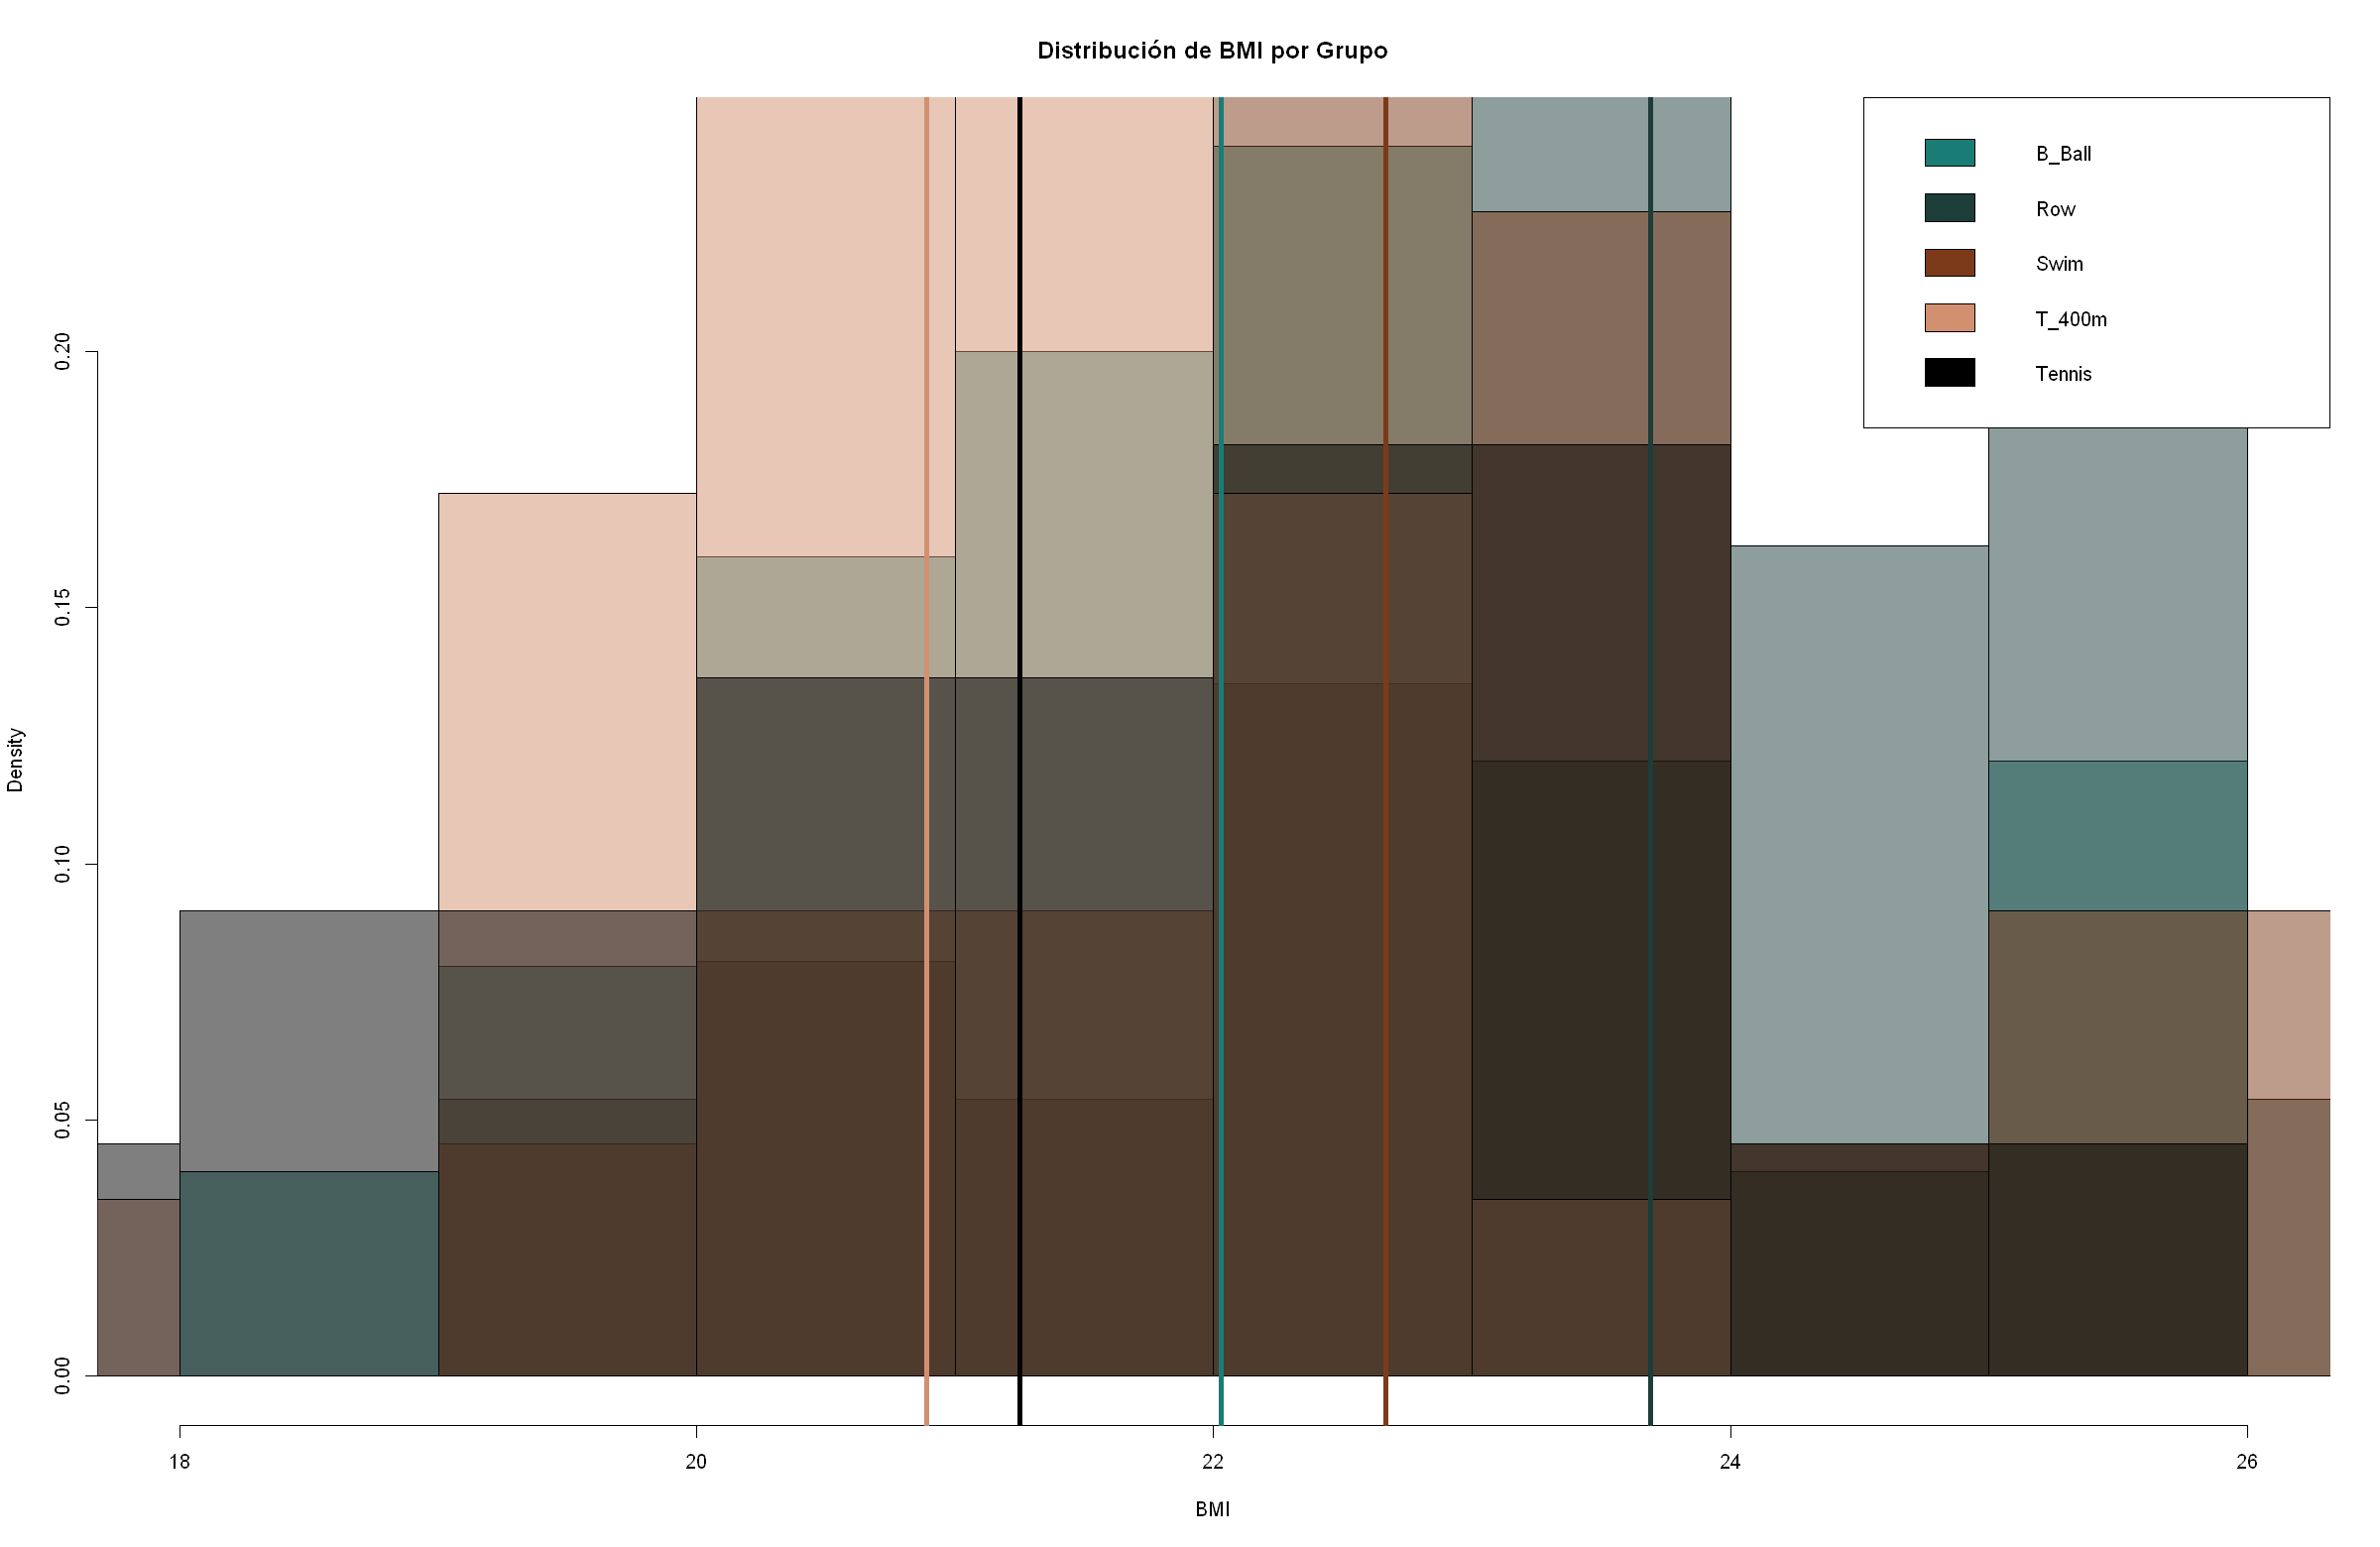

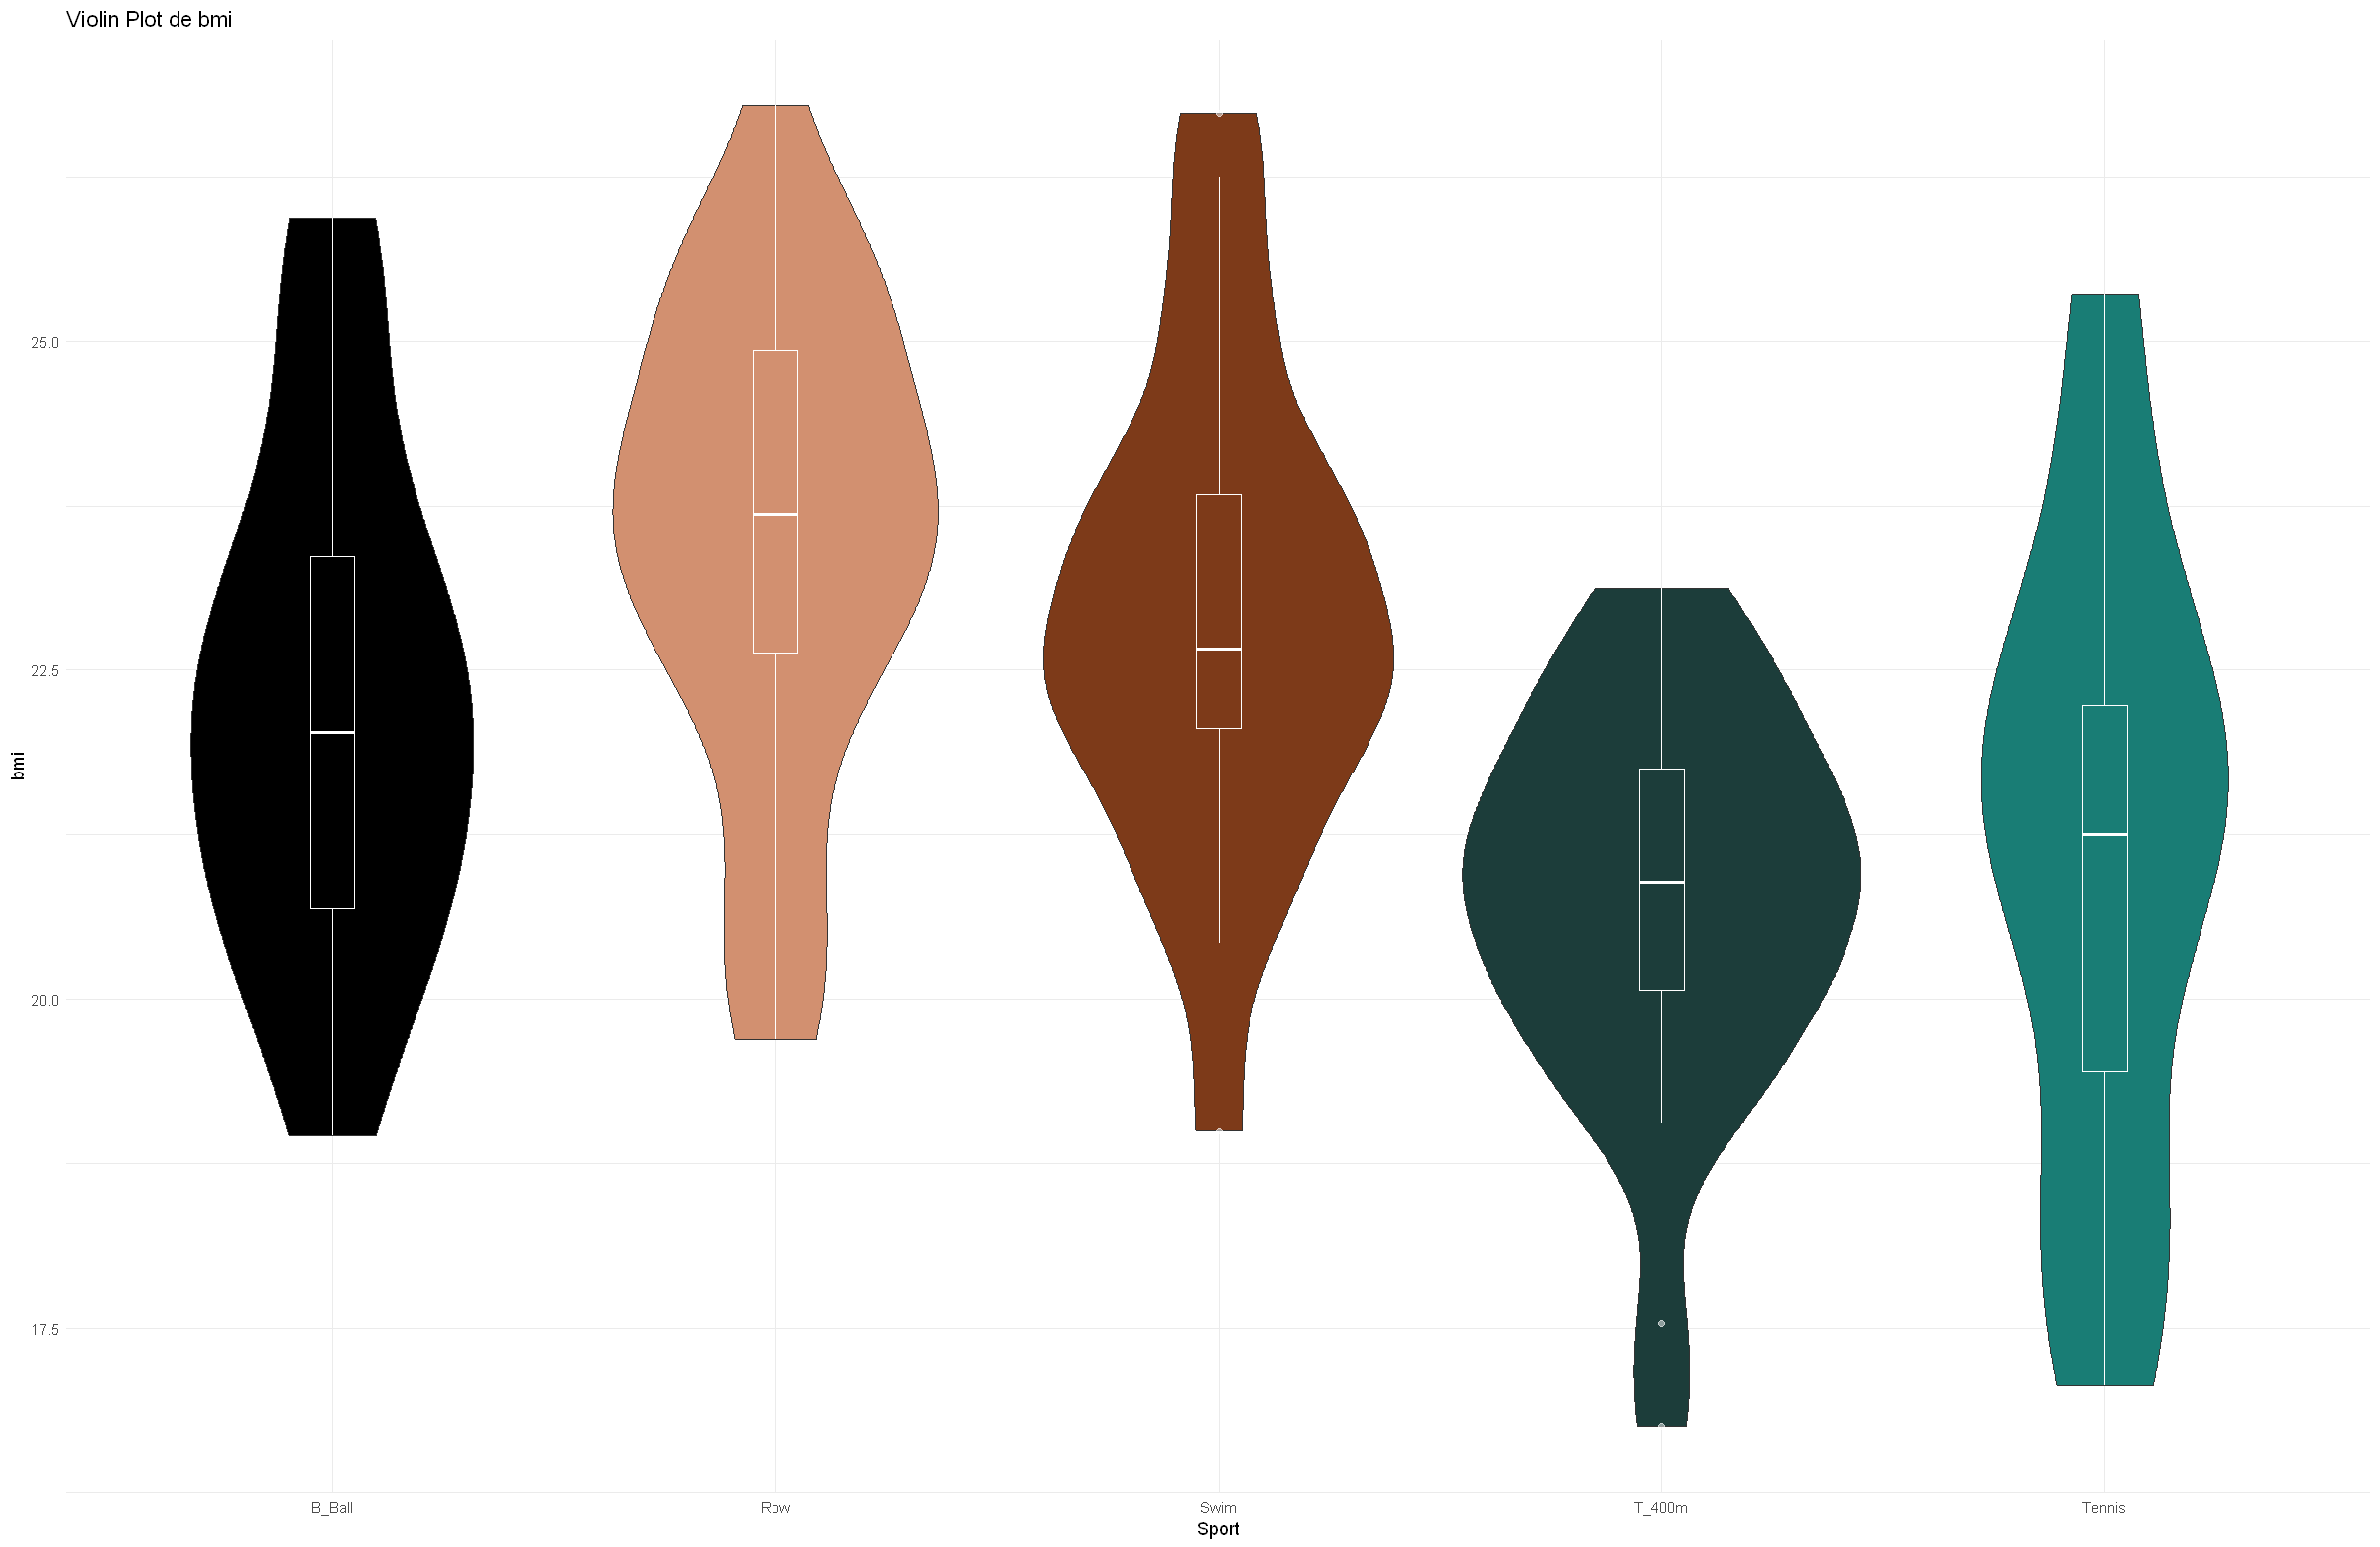

In [45]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13  
)

# Histograma probabilístico con la distribución 'bmi' por grupo 'sport'
hist(subset(data3, sport == 'B_Ball')[,'bmi'],
     col = rgb(25/255, 125/255, 117/255, 0.5),
     main = 'Distribución de BMI por Grupo',
     freq = FALSE,
     xlab = 'BMI')
hist(subset(data3, sport == 'Row')[,'bmi'],
     col = rgb(28/255, 61/255, 58/255, 0.5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'Swim')[,'bmi'],
     col = rgb(125/255, 58/255, 25/255, .5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'T_400m')[,'bmi'],
     col = rgb(210/255, 144/255, 112/255, .5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'Tennis')[,'bmi'],
     col = rgb(0/255, 0/255, 0/255, .5),
     add = TRUE,
     freq = FALSE)

# Leyenda
legend(x = "topright", legend = c('B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis'), fill = c('#197D75', '#1C3D3A', '#7D3A19', '#D29070', '#000000'))

# Mediana 'bmi' por grupo
abline(v = median(subset(data3, sport == 'B_Ball')[,'bmi']), col = rgb(25/255, 125/255, 117/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Row')[,'bmi']), col = rgb(28/255, 61/255, 58/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Swim')[,'bmi']), col = rgb(125/255, 58/255, 25/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'T_400m')[,'bmi']), col = rgb(210/255, 144/255, 112/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Tennis')[,'bmi']), col = rgb(0/255, 0/255, 0/255, 1), lwd = 4)

# Veamos ahora la variable continua que usaremos como variable dependiente: bmi
boxplot_bmi <- create_boxplot('bmi')

# Imprimir el gráfico
print(boxplot_bmi)

####
Como comentario: no veo muy practico el primer grafico cuando hay mas de dos o tres categorias para observar.

In [18]:
anova2 = aov(bmi ~ sport, data = data3)
summary(anova2)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sport         4  148.1   37.03   11.04 1.19e-07 ***
Residuals   119  398.9    3.35                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#####
Este resultado nos indica con un p-valor < 0.05 que  tenemos evidencia suficiente para rechazar nuestra hipótesis nula y por lo tanto  podemos decir que hay una diferencia significativa entre grupos al observar la variable continua y dependiente: 'bmi'.

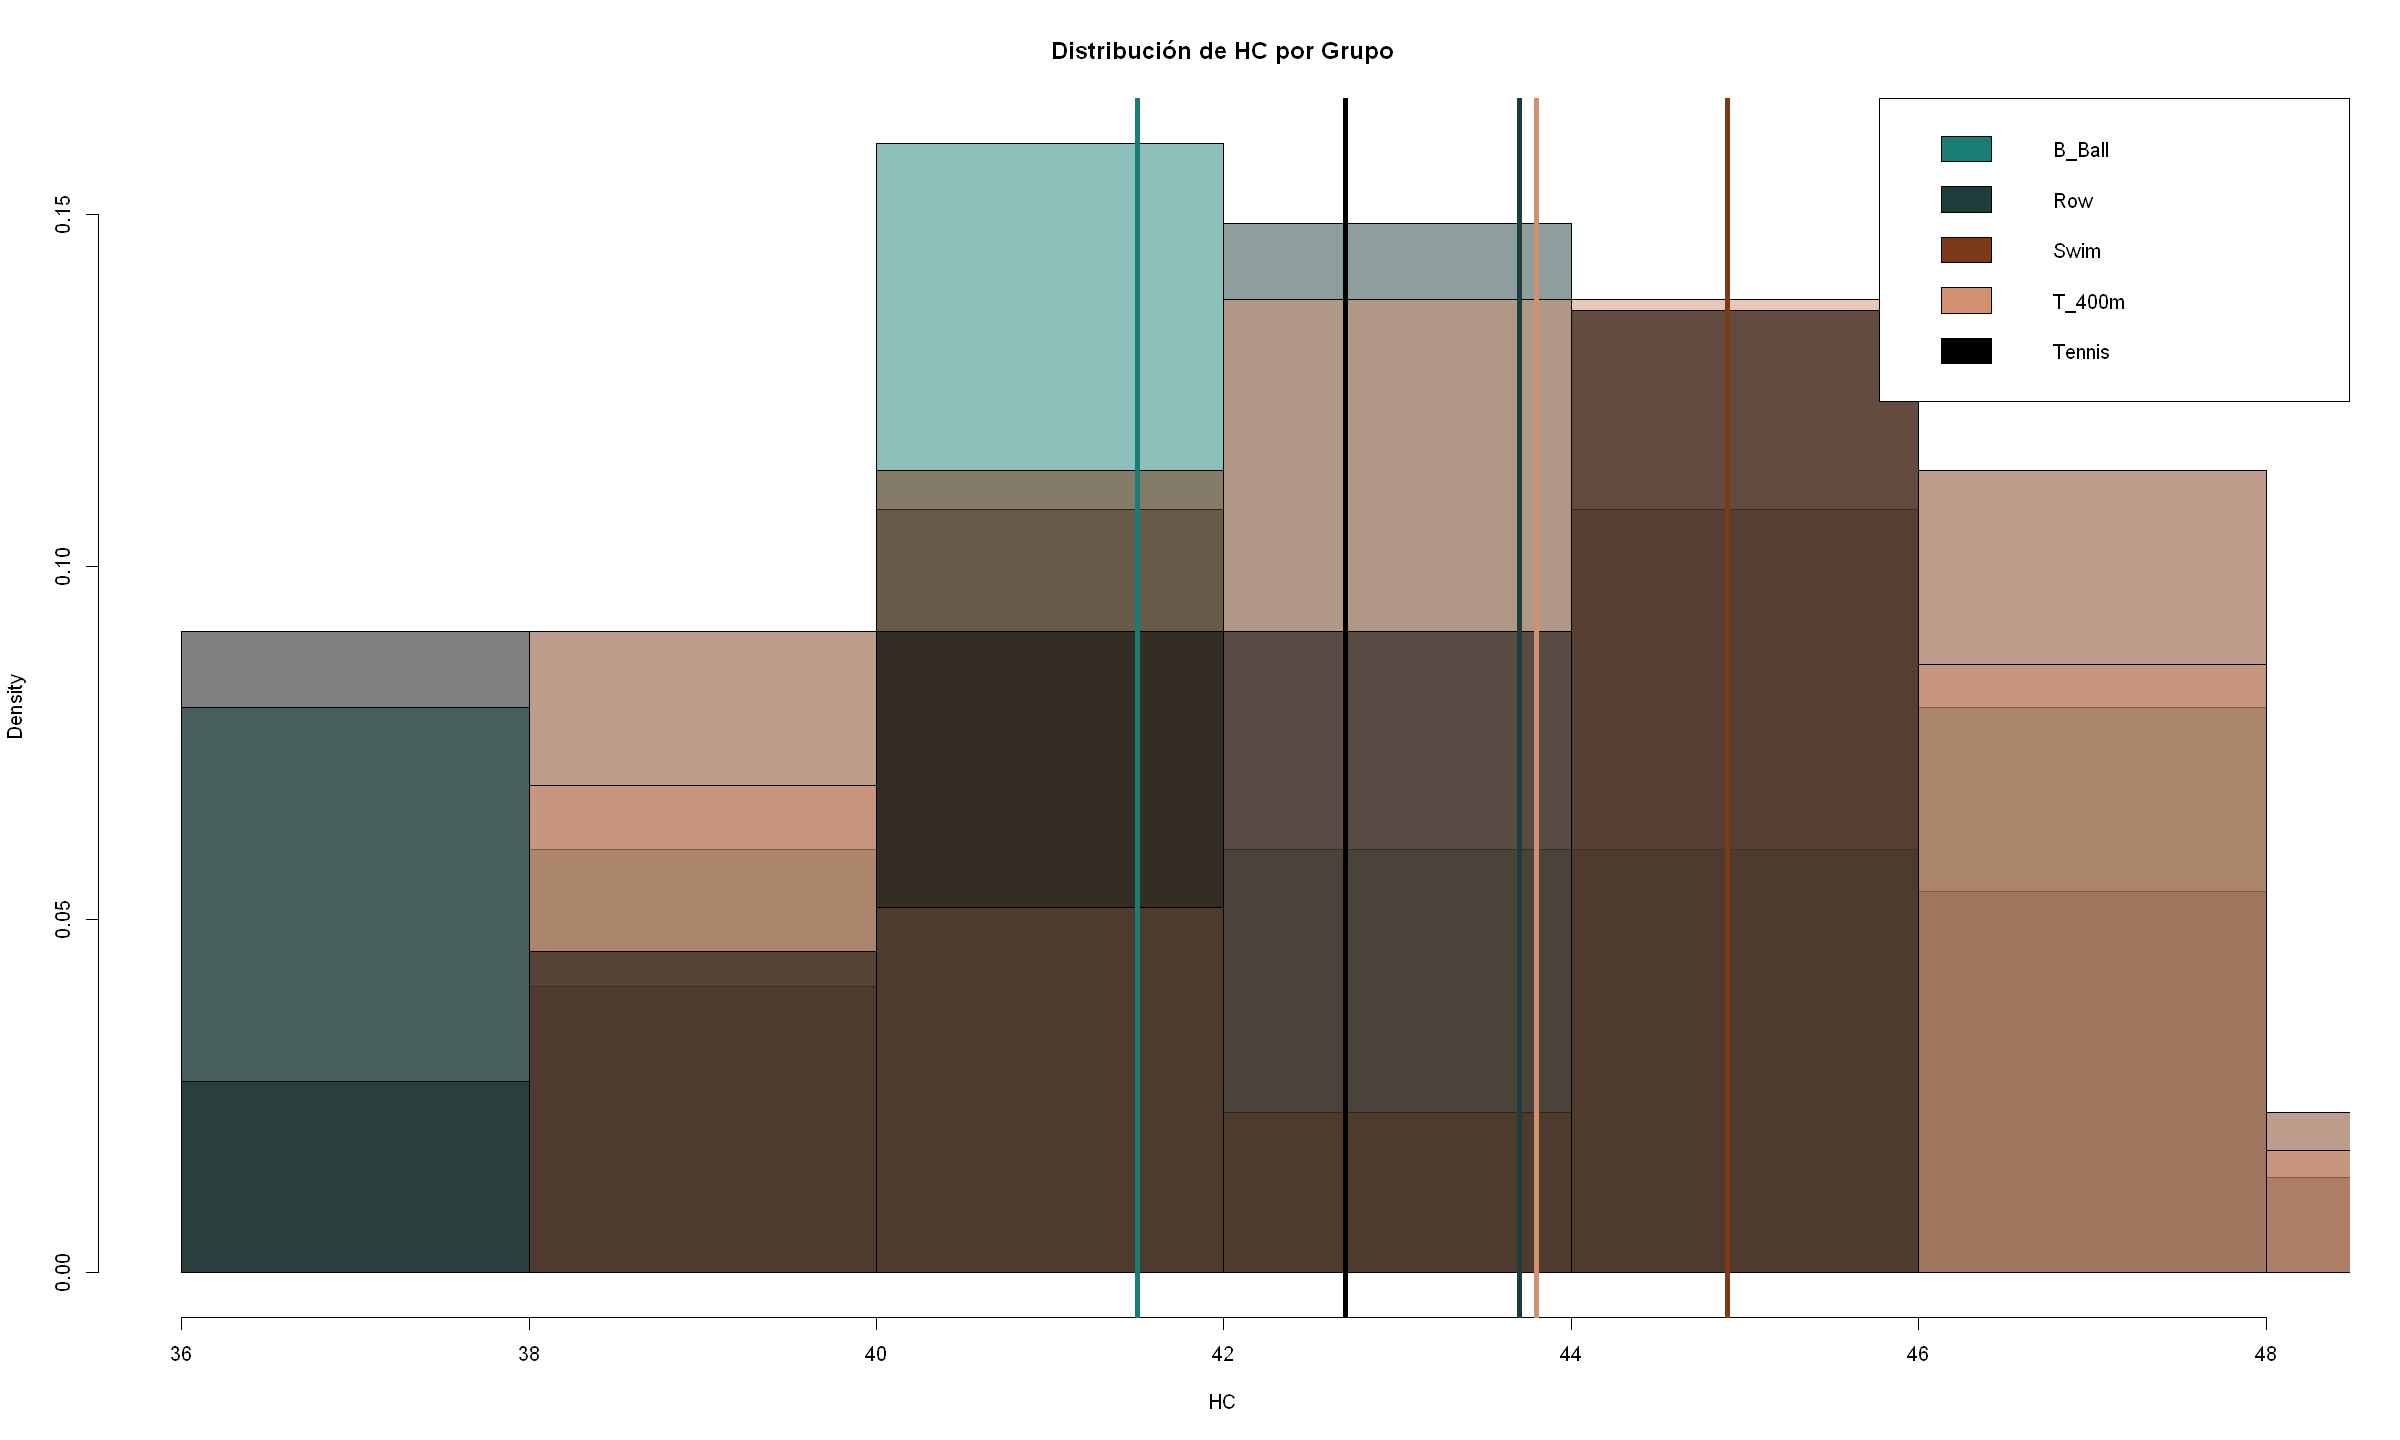

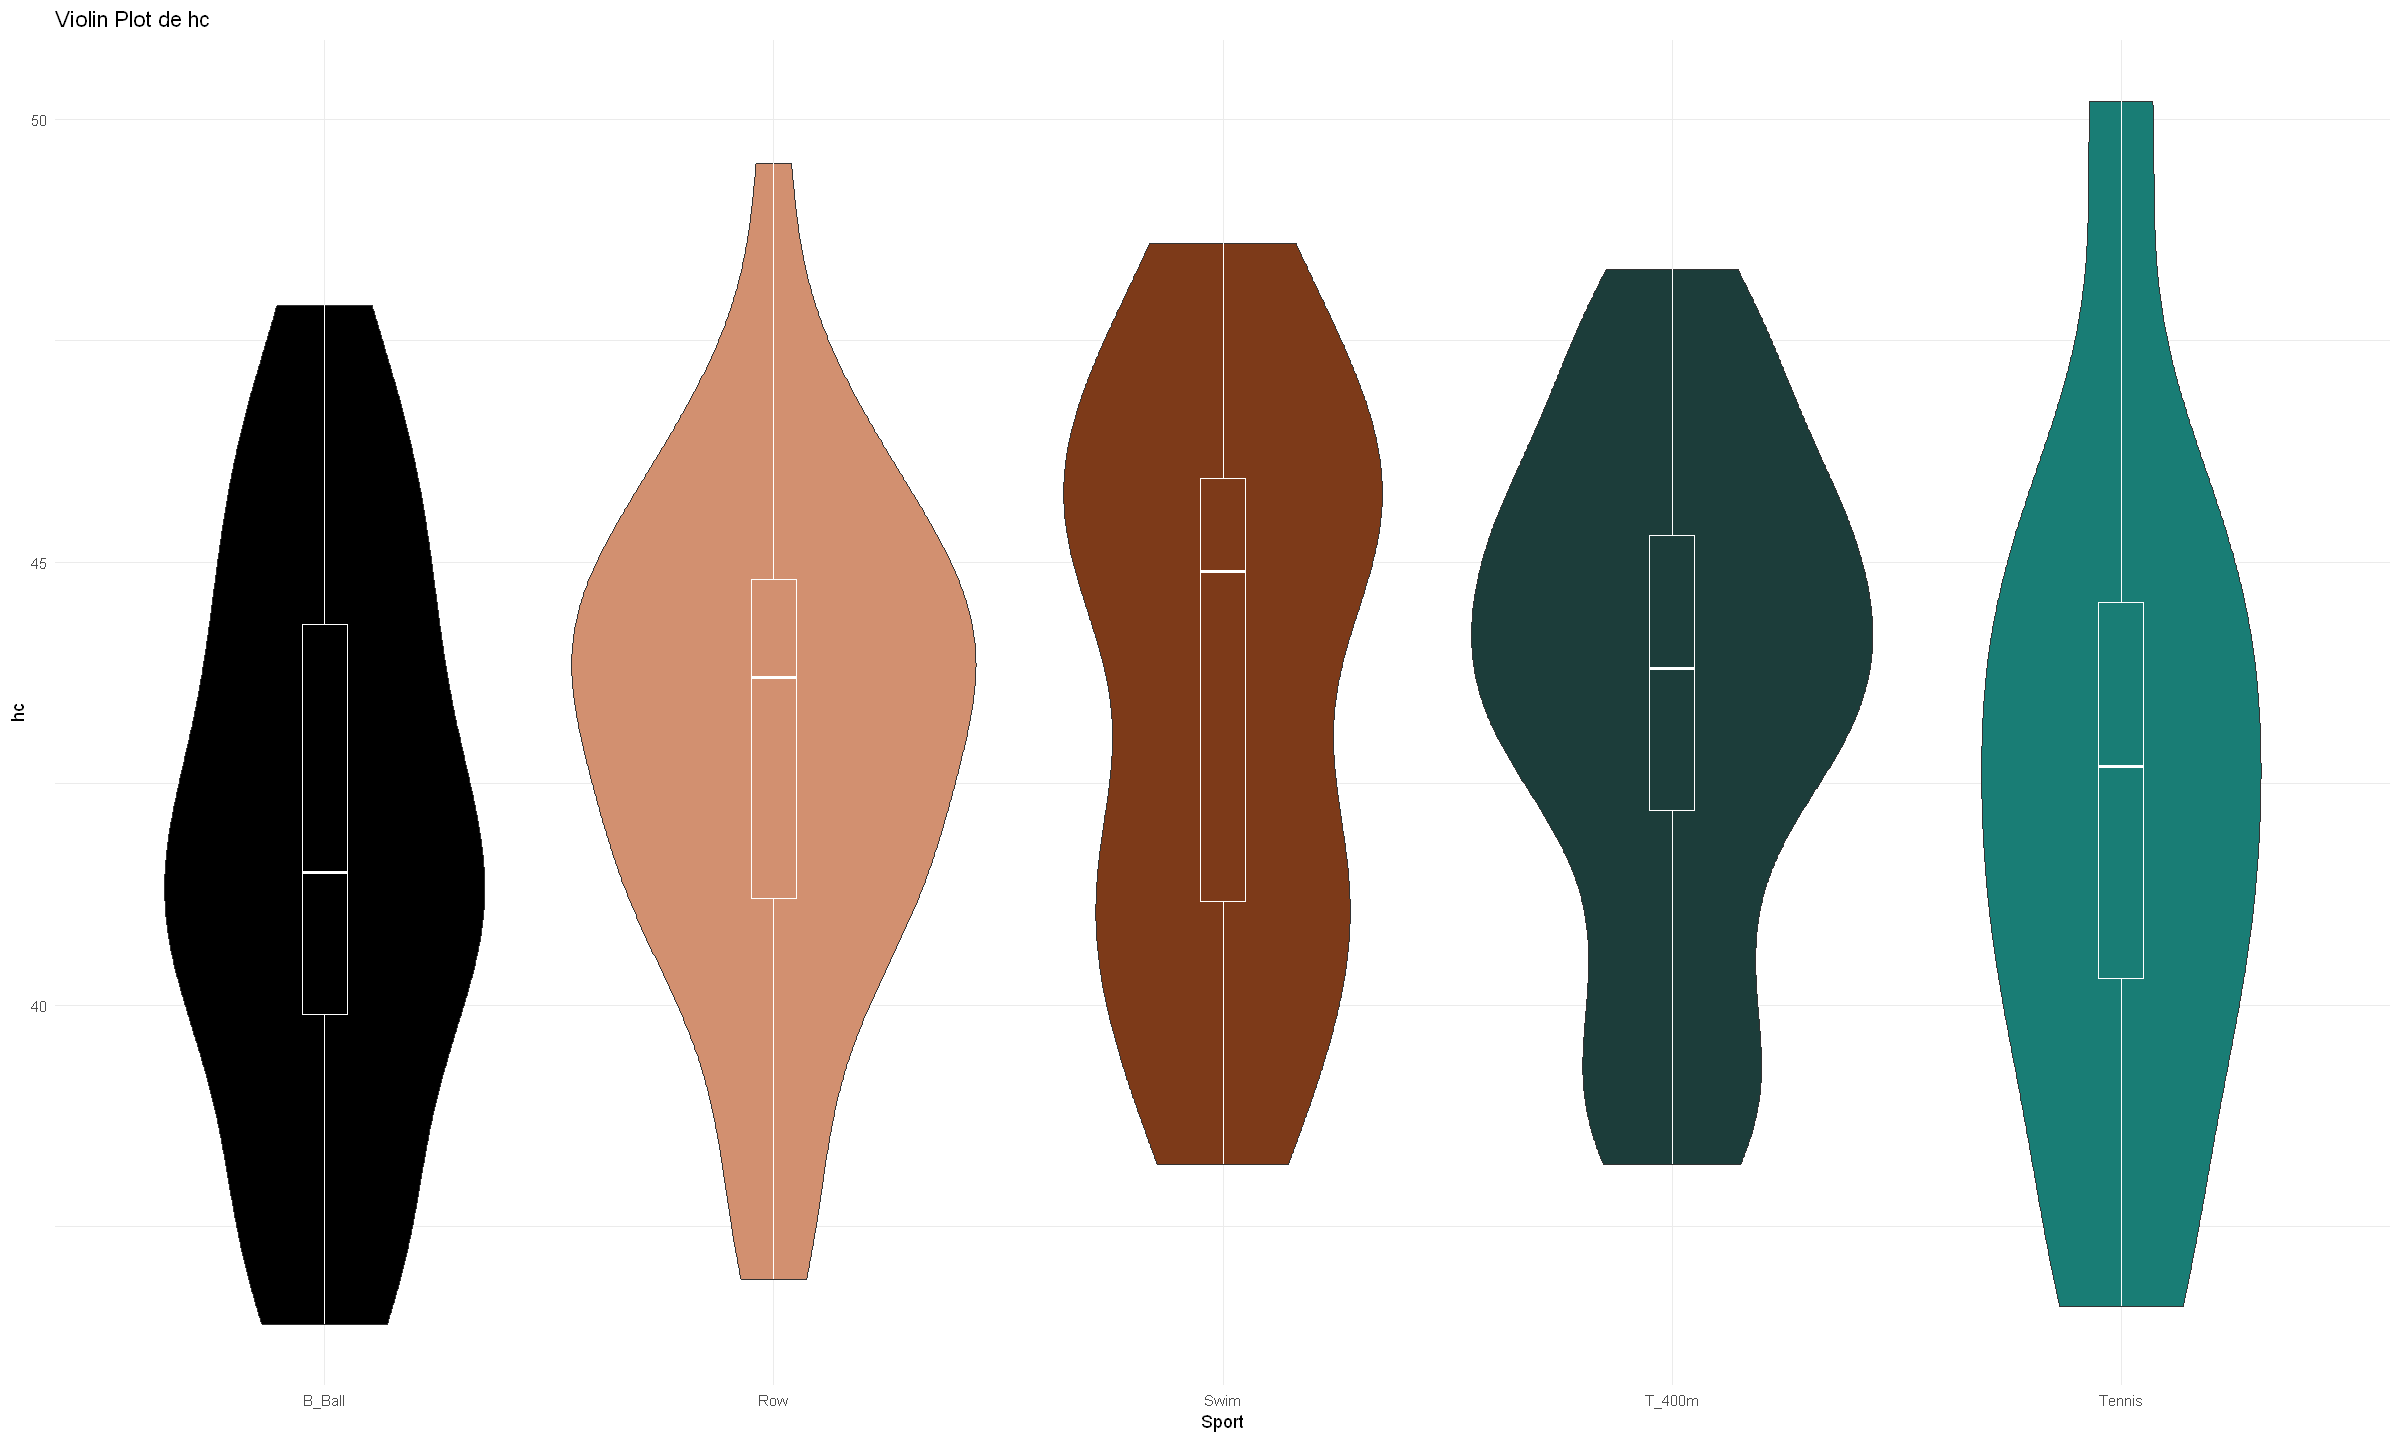

In [34]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 12  
)

# Histograma probabilístico con la distribución 'hc' por grupo 'sport'
hist(subset(data3, sport == 'B_Ball')[,'hc'],
     col = rgb(25/255, 125/255, 117/255, 0.5),
     main = 'Distribución de HC por Grupo',
     freq = FALSE,
     xlab = 'HC')
hist(subset(data3, sport == 'Row')[,'hc'],
     col = rgb(28/255, 61/255, 58/255, 0.5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'Swim')[,'hc'],
     col = rgb(125/255, 58/255, 25/255, .5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'T_400m')[,'hc'],
     col = rgb(210/255, 144/255, 112/255, .5),
     add = TRUE,
     freq = FALSE)
hist(subset(data3, sport == 'Tennis')[,'hc'],
     col = rgb(0/255, 0/255, 0/255, .5),
     add = TRUE,
     freq = FALSE)

# Leyenda
legend(x = "topright", legend = c('B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis'), fill = c('#197D75', '#1C3D3A', '#7D3A19', '#D29070', '#000000'))

# Mediana 'hc' por grupo
abline(v = median(subset(data3, sport == 'B_Ball')[,'hc']), col = rgb(25/255, 125/255, 117/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Row')[,'hc']), col = rgb(28/255, 61/255, 58/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Swim')[,'hc']), col = rgb(125/255, 58/255, 25/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'T_400m')[,'hc']), col = rgb(210/255, 144/255, 112/255, 1), lwd = 4)
abline(v = median(subset(data3, sport == 'Tennis')[,'hc']), col = rgb(0/255, 0/255, 0/255, 1), lwd = 4)


# Crear el boxplot/violin plot solo para la variable 'hc'
boxplot_hc <- create_boxplot('hc')

# Imprimir el gráfico
print(boxplot_hc)

####
Comentario: anteriormente dije que no me parecia muy util el primer grafico, sin embargo aca si nos ayuda a ver que toda la distribucion esta bastante pareja.

In [19]:
anova = aov(hc ~ sport, data = data3)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   53.7  13.426   1.453  0.221
Residuals   119 1099.9   9.243               

#####
Este resultado nos indica con un p-valor > 0.05 que no tenemos evidencia suficiente para rechazar nuestra hipótesis nula y por lo tanto no podemos decir que hay una diferencia significativa entre grupos y la variable continua y dependiente: 'hc'. 

Los resultados de ambos test nos indican que si queremos utilizar las variables continuas como variables dependientes en cada modelo, unicamente para bmi sera relevante incluir la diferenciacion por deporte, ya que para el caso de hc esta diferenciacion no sera significativa en nuestro modelo de regresion lineal.

#### <font color='#197D75'>  4. Analysis of Variance - Two Ways </font>

El ANOVA Two Way (o de dos factores),  permite analizar la significatividad de la influencia<font color='#197D75'> **simultánea**</font> de dos variables categóricas en una variable dependiente continua. En otras palabras, se utiliza para examinar cómo dos factores diferentes, con categorias distintas en cada uno, afectan las medias de los grupos de nuestra variable dependiente.

La hipótesis nula en un ANOVA de dos factores nos indica que no hay efectos significativos de ninguno de los factores ni interacciones entre ellos. La hipótesis alternativa sugiere que al menos un factor o una interacción entre factores es significativa. Este tipo de ANOVA proporciona información más detallada sobre cómo los diferentes niveles de dos factores pueden influir en la variable dependiente y si la magnitud de esta influencia es similar o diferente entre las combinaciones de niveles de ambos factores.

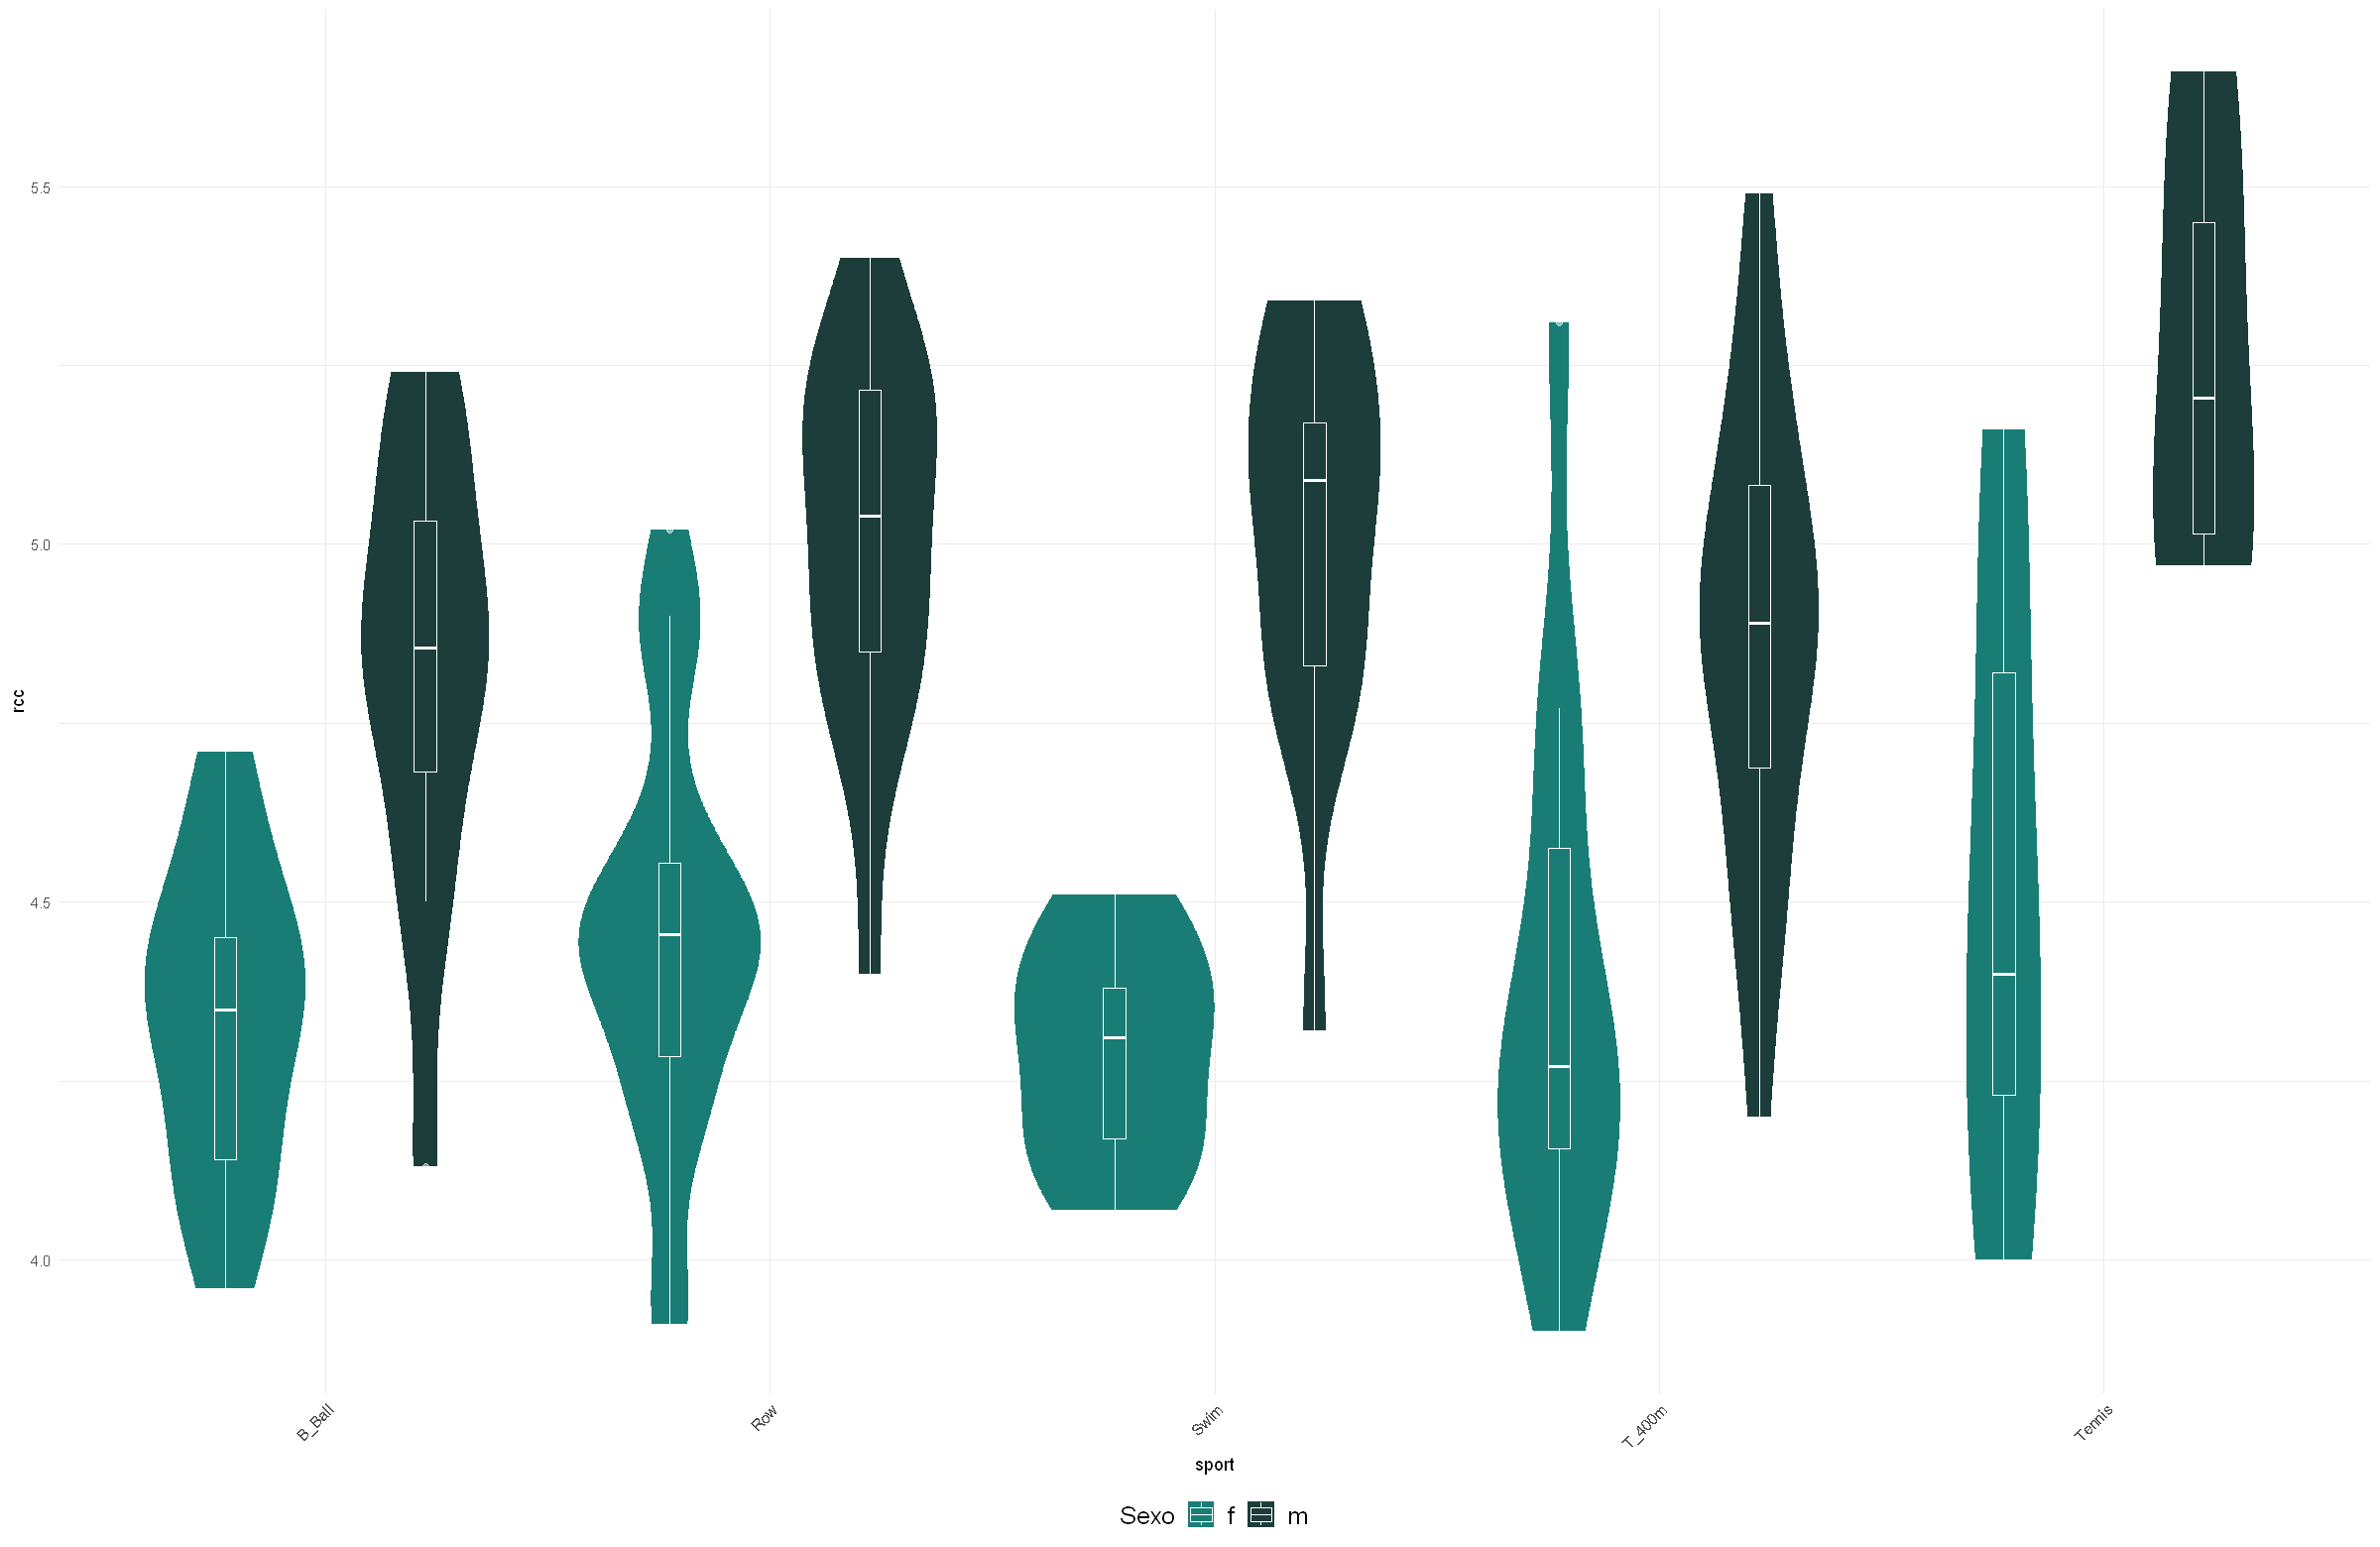

In [47]:
data4 <- data[, c('sex', 'sport', 'rcc', 'wcc', 'hc', 'hg', 'bmi')]

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

data4$sport <- factor(data4$sport)
data4$sex <- factor(data4$sex)

options(
  repr.plot.width = 20,  
  repr.plot.height = 13  
)

ggplot(data4, aes(x = sport, y = rcc, fill = factor(sex))) +
  geom_violin(color = NA) +
  geom_boxplot(width = 0.1, position = position_dodge(0.9), color = "white", alpha = 0.5) +
  theme_minimal() +
  theme(
    legend.position = 'bottom',
    legend.text = element_text(size = 15),
    legend.title = element_text(size = 15),
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotar etiquetas del eje x para mejor visibilidad
  ) +
  scale_fill_manual(values = c('f' = '#197D75', 'm' = '#1C3D3A')) +
  labs(fill = 'Sexo')


####
A niveles graficos parece haber una diferencia entre las categorias y la variable continua rcc. Pero debemos comprobarlo realizando las pruebas estadisticas correspondientes.

In [21]:
anova3 = aov(rcc ~ sport * sex, data = data)
summary(anova3)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4  0.466   0.116   1.279  0.282    
sex           1  9.502   9.502 104.457 <2e-16 ***
sport:sex     4  0.297   0.074   0.815  0.518    
Residuals   114 10.370   0.091                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

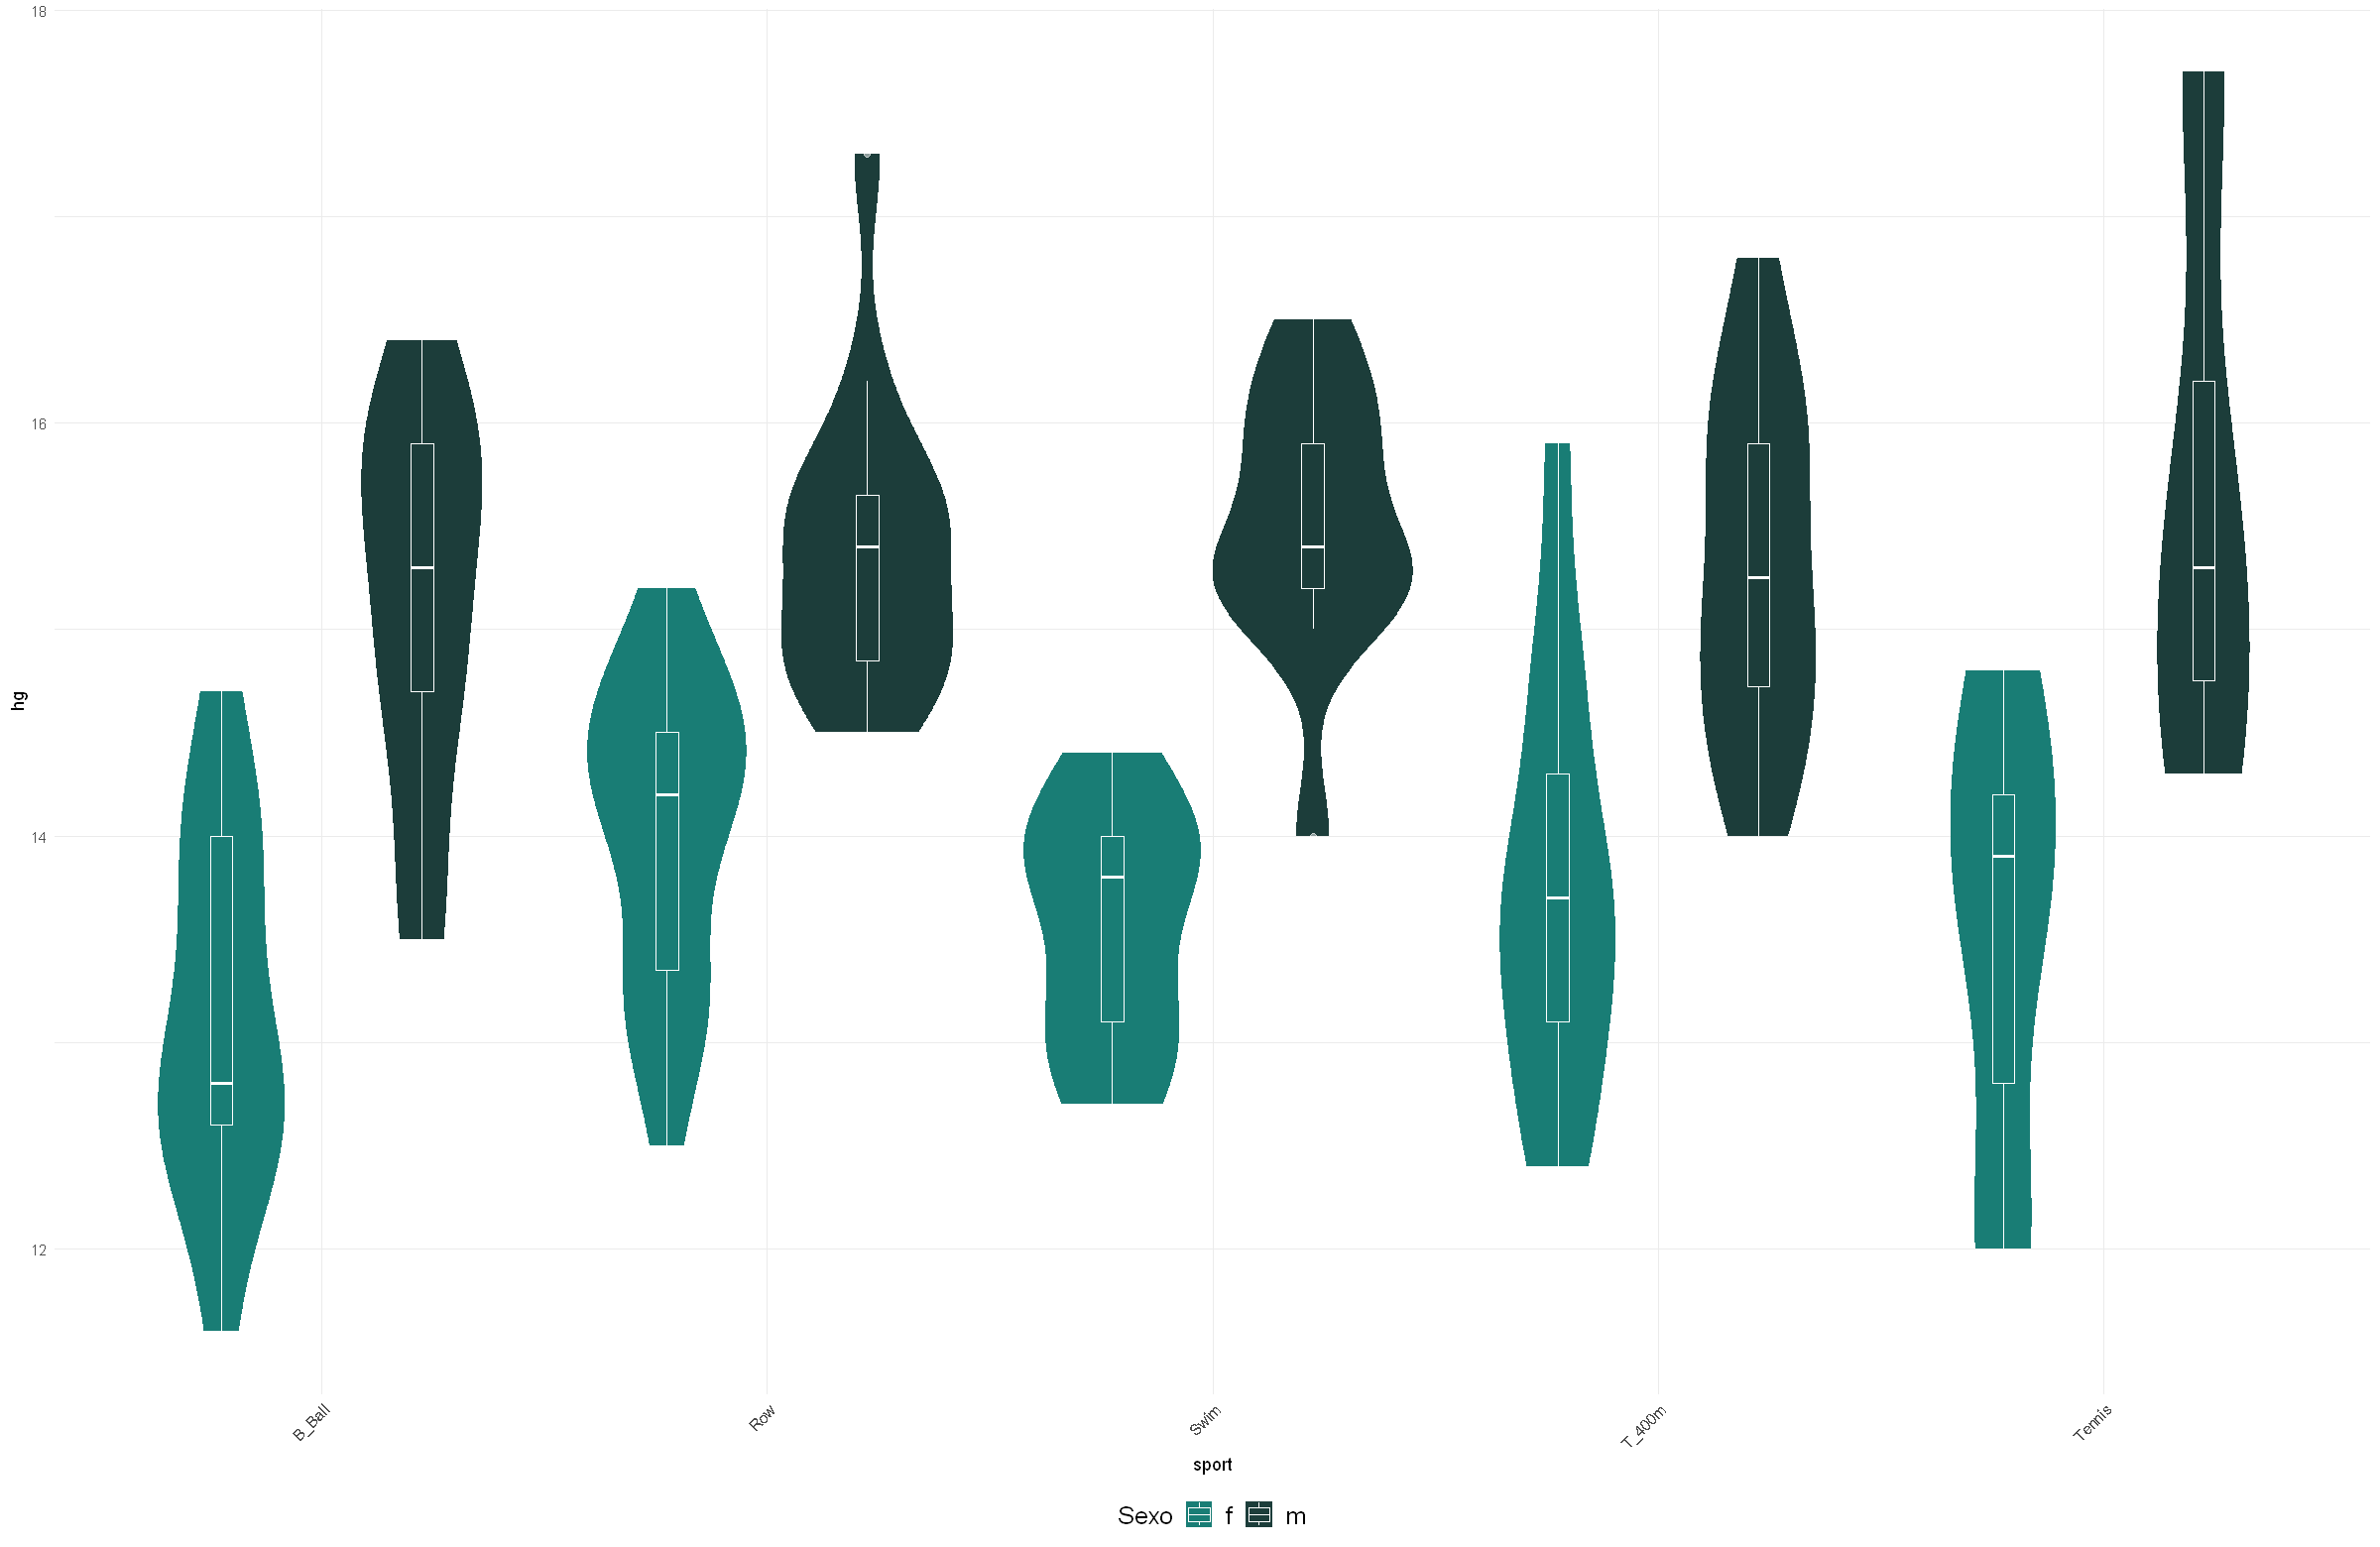

In [49]:
data4 <- data[, c('sex', 'sport', 'rcc', 'wcc', 'hc', 'hg', 'bmi')]

data4$sport <- factor(data4$sport)
data4$sex <- factor(data4$sex)

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

ggplot(data4, aes(x = sport, y = hg, fill = factor(sex))) +
  geom_violin(color = NA) +
  geom_boxplot(width = 0.1, position = position_dodge(0.9), color = "white", alpha = 0.5) +
  theme_minimal() +
  theme(
    legend.position = 'bottom',
    legend.text = element_text(size = 15),
    legend.title = element_text(size = 15),
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotar etiquetas del eje x para mejor visibilidad
  ) +
  scale_fill_manual(values = c('f' = '#197D75', 'm' = '#1C3D3A')) +
  labs(fill = 'Sexo')

In [23]:
anova4 = aov(hg ~ sport * sex, data = data)
summary(anova4)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4   7.20    1.80   2.529 0.0444 *  
sex           1  86.52   86.52 121.641 <2e-16 ***
sport:sex     4   2.62    0.65   0.920 0.4550    
Residuals   114  81.09    0.71                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### <font color='#197D75'>  5. Conclusion </font>

Claramente, ambos resultados de nuestros ANOVA de dos factores nos indican que la variable 'sport' no aporta una diferencia estadísticamente significativa en las distribuciones de nuestras variables continuas cuando se analizan por separado. En otras palabras, al considerar cada variable continua como respuesta individualmente, no encontramos evidencia suficiente para concluir que los diferentes deportes tengan un impacto significativo en estas variables.

Por el contrario, la variable 'sex', tanto en su descripción gráfica como en su evaluación estadística, nos indica que existen diferencias significativas en las medias al evaluar cada variable continua dependiente estudiada. Esto sugiere que el género tiene un efecto estadísticamente significativo en estas variables.

El ANOVA de dos factores también nos permite evaluar la interacción entre estas variables categóricas, es decir, si la combinación de 'sport' y 'sex' tiene un efecto significativo en las medias de las variables continuas. Sin embargo, en este caso, no observamos diferencias significativas de medias al considerar la interacción entre 'sport' y ' Podria haber pasado, que interactuando 'sport' y 'sex' veamos una significatividad, aunque no sucedio en este caso.

Estas conclusiones se basan en las pruebas de ANOVA y deben interpretarse con consideración de las limitaciones del análisis y del contexto específico del estudio. Recordemos que la combinacion de 'sex'=f y nuestra variable continua 'rcc', no pasaron el supuesto de normalidad.

En este caso visualizamos que todas las variables tenian una distribucion normal, simetrica, con media y mediana similares, que habia poca presencia de outliers (solamente una observacion), y que no teniamos presencia de nulos en ninguna observacion. Es aquella variable que nos permitira evaluar si realmente es necesario incluir una variable categorica o no. Luego, en caso de utilizar variables categoricas, es importante destacar que el analisis de la varianza a traves del metodo ANOVA es una herramienta que tenemos para poder afinar nuestro modelo de estimacion, generando estimadores cada vez mas precisos y eficientes.sex'.